<center>
<img src="https://repository-images.githubusercontent.com/286819592/b82e14cf-3c85-4f91-84c0-bea095c353a8" width=800 height=500 />
</center>

# Table of Contents
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
    - [2.1 Function](#2.1)
        - [2.1.1 Residual Plot](#2.1.1)
        - [2.1.2 Detection Values](#2.1.2)
        - [2.1.3 Visualize 3 plots](#2.1.3)
        - [2.1.4 Visualize categorical feaures](#2.1.4)
        - [2.1.5 Prepocessing](#2.1.5)
            - [2.1.5.1 Transforming](#2.1.5.1)
        - [2.1.6 Feature selection(VIF and P-values)](#2.1.6)
        - [2.1.7 Model Checking](#2.1.7)
            - [2.1.7.1 Model Prediction](#2.1.8)
- [3. Data Loading](#3)
    - [3.1 Basic Understanding](#3.1)
        - [ Detect missing values](#3.1.1)
    - [3.2 Data clearning](#3.2)
        - [Handling Missing vlaues](#3.2.1)
- [4. EDA](#4)
    - [4.1 Overview of Data](#4.1)
    - [4.2 Feature Distribution of Categorical Features](#4.2)
    - [4.3 Feature Distribution of Continous Features](#4.3)
    - [4.4 Target Distribution ](#4.4)
    - [4.5 Correlation Matrix ](#4.5)
    - [4.6 Feature Engineering](#4.6)
        - [4.6.1 Data Transformation](#4.6.1)
- [5. Data Pre-Processing](#5)    
    - [5.1 Handling outlier](#5.1)
    - [5.2 Encoding](#5.2)
- [6. Modeling](#6)
    - [6.1 Linear Regression](#6.1)
    - [6.2 Ridge Regression](#6.2)
    - [6.3 Lasso Regression](#6.3)
    - [6.4 Polynomail Regression](#6.4)
    - [6.5 Ridge Polynomail Regression](#6.5)
    - [6.6 Lasso Polynomail Regression](#6.6)
- [7. Conclution](#7)   

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id="1"></a>
<span style="color:#00BFC4;">Introduction</span>
</p>
</div>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Car Price Prediction:</u></b><br>
 
The automobile market in Cambodia has been growing rapidly in recent years, with an increasing number of car buyers seeking to purchase new and used cars. As a result, there has been a growing interest in determining the factors that influence car prices in Cambodia. In this study, we aim to explore the relationship between various car features and their impact on car prices in the Cambodian market.

To achieve this goal, we collected data on car prices and features from Khmer24, one of the largest online marketplaces for cars in Cambodia. We scraped the data and compiled a dataset containing information on various car features such as make, model, year, and transmission type, as well as their corresponding prices.
</div>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id="2"></a>
<span style="color:#00BFC4;">Imports</span>
</p>
</div>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import normaltest
from scipy.stats import shapiro
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from scipy import *

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 

from sklearn.model_selection import train_test_split, KFold
kf = KFold(shuffle=True, random_state=72018, n_splits=20)

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, LabelEncoder, RobustScaler


from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


from IPython.display import clear_output
# !pip3 install -U lazypredict
# !pip3 install -U pandas #Upgrading pandas

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4f}'.format
%matplotlib inline
clear_output()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id="2.1"></a>
<span style="color:#00BFC4;">Function</span>
</p>
</div>

### <a id = '2.1.1'> Residual Plot </a> 

In [2]:
def residual_plot(X_train, X_test, y_train, y_test, lm,log = False, boxcox = False, lambda_bc = False, sqrt = False):
    from scipy.stats import shapiro
    
    lm.fit(X_train, y_train)
    y_test_pred = lm.predict(X_test)
    residuals = y_test - y_test_pred
    
#     # normality test
#     stat, p = normaltest(residuals)
#     print('Statistics=%.3f, p=%.3f' % (stat, p))
#     # interpret results
#     alpha = 0.05
#     if p > alpha:
#         print('Sample looks Gaussian (fail to reject H0)')
#     else:
#         print('Sample does not look Gaussian (reject H0)')
        
        
    # normality test
    stat, p = shapiro(residuals)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret results
    alpha = 0.05
    if p > alpha:
        print('Residual looks Gaussian (fail to reject H0)')
    else:
        print('Residual does not look Gaussian (reject H0)')
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 3, 1)
    sns.distplot(residuals, bins=20)
    plt.title('Distribution of Residuals')
    plt.xlabel('Errors')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    plt.scatter(y_test, y_test_pred, label="Predicted vs Actual")
    plt.plot(y_test, y_test, 'r', label="Perfect Prediction")
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual prices')
    plt.ylabel('Predicted prices')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
    sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    

    sm.qqplot(residuals, line='s')
    plt.title('QQ Plot of Residuals')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    
    plt.show()
    
    if log:
        y_test = np.exp(y_test).values
        y_test_pred = pd.Series(np.exp(y_test_pred)).values
    elif boxcox:
        y_test_pred = inv_boxcox(y_test_pred, lambda_bc)
        y_test = inv_boxcox(y_test, lambda_bc)
    elif sqrt:
        y_test = np.square(y_test).values
        y_test_pred = pd.Series(np.square(y_test_pred)).values
        
    residuals = y_test - y_test_pred
    return residuals

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.2'>Detection Values </a>

In [3]:
def check_column_value(df, value):
    """
    Checks if each column in a pandas DataFrame contains a specific value and prints the column names that contain the value.
    
    Parameters:
        df (pandas DataFrame): The DataFrame to check.
        value (any type): The value to look for in each column.
    
    Return: 
        The functoin will return indexs of the values in dataframe
    """
    if type(value) != str:
        values = list(value)
    elif type(value) == list():
        values = value
    else: values = [value]
    matching_columns = df.apply(lambda col: col.isin(values).any())
    matching_columns = matching_columns[matching_columns == True]
    count = {}
    index = set()
    for value in values:
        for col in matching_columns.index.tolist():
            if count == {}:
                count[col] = []
            elif col not in count:
                count[col] = []
            
            count[col].append(df[df[col] == value].loc[:, col].count())
            for i in df[df[col] == value].loc[:, col].index.tolist():
                index.add(i)
  
    print(f"\033[94mColumns that contain the {values}:\n")
    print(pd.Series(count))
    
    return index
    

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.3'> Visualize 3 plots </a>

In [4]:
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.4'> Visualize Categorical Features </a> 

In [5]:
def categorical_visualization(cols, target):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y=target,data=df,palette="Set2")
    plt.title(f"{cols} vs {target}",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)[target].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y=target,data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
def scatter_plot(cols, target, df):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y= target,data=df,color="blue")
        plt.title(f"{col} vs {target}",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

In [6]:
def check_correlation(input, output, data):
    # Fit the linear regression model
    model = ols(output +'~' + input, data=data).fit()
    alpha = 0.05

    # Calculate the ANOVA table
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Print the ANOVA table
    print(anova_table)
    print('\n')
    if anova_table['PR(>F)'][0]< alpha:
        print(f"There is a significant linear relationship between the {input} variable and the {output} variable.")
    else: 
        print(f"There isn't a significant linear relationship between the {input} variable and the {output} variable.")

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.5'> Prepocessing </a>  

In [7]:
def dummy(new_df, categorical_features, threshold=None):
    X = new_df.copy()
    if threshold is None:
        threshold = np.max(X[categorical_features].nunique().values.tolist())
    cat_feature = [feature for feature in categorical_features if X[feature].nunique() <= threshold]
    df_dummy = pd.get_dummies(columns=cat_feature, data=X)
    return df_dummy, cat_feature

def label_encoding(df, threshold=False):
    X = df.copy()
    
    categorical = X.select_dtypes(include = np.object_).columns.tolist()

    if not threshold:
        threshold = np.max(X[categorical].nunique().values.tolist())
    else:
        categorical = [feature for feature in categorical if X[feature].nunique() <= threshold]

    # Create a LabelEncoder object
    le = LabelEncoder()
    mapping = {}
    # Encode each categorical feature
    for feature in categorical:
        le.fit(X[feature])
        
        encoded_labels = le.transform(X[feature])
        X[feature] = encoded_labels

        # decode the labels
        decoded_labels = le.inverse_transform(encoded_labels)
        mapping[feature] = list(zip(decoded_labels, encoded_labels))

    return X, categorical, mapping

def target_encodnig(df_ro, include, target):
    import category_encoders as ce
    from sklearn.model_selection import train_test_split

    df_target = df_ro.copy()
    categorical_features_target = df_target.select_dtypes(include=include).columns.tolist() 

    # Split the data into training and validation sets
    train, val = train_test_split(df_target, test_size=0.3, random_state=42)

    # Initialize the target encoder
    target_encoder = ce.TargetEncoder(cols= categorical_features_target)

    target_encoder.fit(train[categorical_features_target], train[target])
    
    mapping = {}
    for i in range(len(target_encoder.ordinal_encoder.mapping)):
        feature_name = target_encoder.ordinal_encoder.mapping[i]['col']
        feature = target_encoder.ordinal_encoder.mapping[i]['mapping'].index
        encoding = target_encoder.mapping[target_encoder.ordinal_encoder.mapping[i]['col']].values
        mapping[feature_name] = list(zip(feature, encoding))

    # Encode the categorical variable for both training and validation data
    train_encoded = target_encoder.transform(train[categorical_features_target])
    val_encoded = target_encoder.transform(val[categorical_features_target])

    # Combine the encoded variable with the original data
    train = pd.concat([train.drop(categorical_features_target, axis=1), train_encoded], axis=1)
    val = pd.concat([val.drop(categorical_features_target, axis=1), val_encoded], axis=1)
    y_train = train.pop(target)
    y_test = val.pop(target)
    
    X_train = train
    X_test = val
    
    return X_train, X_test, y_train, y_test, mapping, target_encoder

def encoding_unseen_data(X, mapping_label, target_encoder):
    """
    _ X             : Unseen data to be encoding
    _ mapping_label : The object that was encoding using label encode of the model
    _ target_encoder: The object that was encoding using target encode of the model
    -------
    
    return X: The data was the same encoding of X train in the model
    
    """
    A = X.copy()
    for col in mapping_label.keys():
        df = pd.DataFrame(mapping_label[col], columns=[col , 'Encode'])
        encoded_col = []
        values = A[col].values.tolist()
        for value in values:
            encoded = df[df[col] == value]['Encode'].value_counts().index[0]
            encoded_col.append(encoded)
        A[col] = encoded_col
        
    A[target_encoder.feature_names_out_] = target_encoder.transform(A[target_encoder.feature_names_out_])
    return A

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### Outlier 

In [8]:
def insight_range_price(car_make_Budget, car_model_Budget, df_Budget, range_price):
    print(f'\033[94m')
    print(f'The total number of Car brands and Car models in range of {range_price} prices',df_Budget.shape[0])
    print(f'The total number of Car brands in range of {range_price} prices', len(car_make_Budget))
    print(f'The total number of Car models in range of {range_price} prices', len(car_model_Budget))



# func to Interquartile Range Method
def out_iqr(df , column, log = False):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    if log:
        iqr1 = np.exp(iqr)
        lower1 = np.exp(lower)
        upper1 = np.exp(upper)
    else:
        iqr1 = iqr
        lower1 = lower
        upper1 = upper
        
    print('The IQR is',iqr1)
    print('The lower bound value is', lower1)
    print('The upper bound value is', upper1)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

def visulize_outlier(df, col, log = False):
    out_iqr(df, col, log)
    plt.figure(figsize = (10,6))
    sns.distplot(df[col], kde=False)
    plt.axvspan(xmin = lower,xmax= df[col].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= df[col].max(),alpha=0.2, color='red')
    plt.show()

def outlier_detection(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    upper_end = Q3+1.5*IQR
    lower_end = Q1 - 1.5*IQR
    outlier = df[(df>upper_end) | (df<lower_end)]
    return outlier

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id =  '2.1.5.1'> Transforming  </a>

In [9]:
def boxcox_transform(new_df, col):
    
    X = new_df.copy()

    # Box-Cox transformation
    transformed_data, lambda_param = stats.boxcox(X[col])

    Boxcox = pd.Series(transformed_data)
        # normality test
    stat, p = normaltest(Boxcox)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret results
    alpha = 0.05
    if p > alpha:
        print(f'Do boxcox transform, The {col} looks Gaussian (fail to reject H0)')
    else:
        print(f'Do boxcox transfrom, the {col} does not look Gaussian (reject H0)')
    
    t=sns.distplot(Boxcox,label="Skewness: %.2f"%(Boxcox.skew()) )
    t.legend()
    return Boxcox, lambda_param

def log_ts(df_select, col):
    X = df_select.copy()
    log_ts = X[col].map(lambda i: np.log(i) if i > 0 else 0)
    
    stat, p = normaltest(log_ts)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret results
    alpha = 0.05
    if p > alpha:
        print(f'Do log transfrom, the {col} looks Gaussian (fail to reject H0)')
    else:
        print(f'Do log transfrom, the {col} does not look Gaussian (reject H0)')
        
    t = sns.distplot(log_ts,label="Skewness: %.2f"%(log_ts.skew()) )
    t.legend()
    return log_ts

def sqrt_ts(df_select, col):
    
    X = df_select.copy()
    sqrt_ts = X[col].map(lambda i: np.sqrt(i))
    
    stat, p = normaltest(sqrt_ts)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret results
    alpha = 0.05
    if p > alpha:
        print(f'Do sqare root transfrom, the {col} looks Gaussian (fail to reject H0)')
    else:
        print(f'Do sqare root transfrom, the {col} does not look Gaussian (reject H0)')
    
    t = sns.distplot(sqrt_ts,label="Skewness: %.2f"%(sqrt_ts.skew()) )
    t.legend()
    return sqrt_ts

def scaler_df(df, numerical_features, scaler, Object = False, from_object = False):
    """
    _ df: data frame 
    _ numerical_features: list of all columns to be scaling
    _ Object: The scaler object need to be used
    _ from_object: used the object that was transformed
    ------
    
    return df, sc (scaler object)
    """
    X = df.copy()
    
    if Object:
        sc = scaler.fit(X[numerical_features])
        X[numerical_features] = sc.transform(X[numerical_features])
        return X, sc
    
    elif from_object:    
        X[scaler.get_feature_names_out().tolist()] = scaler.transform(X[scaler.get_feature_names_out().tolist()])
        return X
    else:
        X[numerical_features] = scaler.fit_transform(X[numerical_features])
        return X
    



<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.6'> Feature Selection </a> 

In [10]:
def drop_high_pvalue_features(X, y, alpha=0.05):
    """
    Drops one feature at a time based on the p-value until all p-values are less than or equal to the specified alpha level.
    
    Parameters:
        df (pandas DataFrame): The DataFrame to check for high p-values.
        alpha (float): The alpha level above which features will be dropped. Default is 0.05.
    
    Returns:
        pandas DataFrame: The DataFrame with high p-value features dropped.
    """
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    
    # Iterate until all p-values are less than or equal to the alpha level
    while results.pvalues.values.max() > alpha:
        # Drop the feature with the highest p-value
        drop_feature = results.pvalues.idxmax()
        X = X.drop(columns=[drop_feature], axis = 'columns')
        # Fit a new OLS model with the remaining features
        X = sm.add_constant(X)
        model = sm.OLS(y, X)
        results = model.fit()
        
    return X.drop(columns=['const'], axis='columns')

In [11]:
def drop_high_vif_features(features, vif_thresh=5):
    """
    Drops one feature at a time based on the VIF value until all VIF values are less than or equal to the specified threshold.
    
    Parameters:
        df (pandas DataFrame): The DataFrame to check for high VIF values.
        vif_thresh (float): The threshold VIF value above which features will be dropped. Default is 5.
    
    Returns:
        pandas DataFrame: The DataFrame with high VIF features dropped.
    """
    vifs = pd.Series([variance_inflation_factor(features.values, i) for i in range(features.shape[1])], index=features.columns)
    
    # Iterate until all VIF values are less than or equal to the threshold
    while vifs.max() > vif_thresh:
        # Drop the feature with the highest VIF value
        drop_feature = vifs.idxmax()
        features = features.drop(columns=[drop_feature])
        
        # Re-calculate VIF values for remaining features
        vifs = pd.Series([variance_inflation_factor(features.values, i) for i in range(features.shape[1])], index=features.columns)
    
    return features

In [12]:
def feature_selection_vif_pvalues(X, y, alpha = 0.05, vif_thresh = 5):
    X_new = drop_high_pvalue_features(X, y, alpha)
    X_new1 = drop_high_vif_features(X_new, vif_thresh)
    return X_new1

In [13]:
def ODL_checking(X_train_rfec, y_train):
    X_train_rfec = sm.add_constant(X_train_rfec)
    lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

    #Summary of linear model
    print(lm_rfe.summary())
    return lm_rfe

In [14]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def VIF(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False) 
    vif = vif.reset_index(drop = True)
    return vif

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.7'> Model checking </a> 

In [15]:
Algorithms = {'Training Score': [],
        'Testing Score' : [],
        'Algorithms': []
        }
def model_prediction(x_train, x_test, y_train, y_test, model, name,log = False, boxcox = False, lambda_bc = False, sqrt = False, record = False):
    
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    a = r2_score(y_train,y_train_pred)*100
    b = r2_score(y_test,y_test_pred)*100
    
    if log:
        y_test = np.exp(y_test).values
        y_test_pred = pd.Series(np.exp(y_test_pred)).values
    elif boxcox:
        y_test_pred = inv_boxcox(y_test_pred, lambda_bc)
        y_test = inv_boxcox(y_test, lambda_bc)
    elif sqrt:
        y_test = np.square(y_test).values
        y_test_pred = np.square(y_test_pred)
    
    # calculate number of samples (n) and number of predictor variables (p)
    n = len(y_train)
    p = len(X_train.columns)

    # calculate adjusted R-squared
    adjusted_r_squared = 1 - (1 - a/100) * (n - 1) / (n - p - 1)
    
    if record:
        Algorithms['Algorithms'].append(name)
        Algorithms['Training Score'].append(a)
        Algorithms['Testing Score'].append(b)
    
    print(f"r2_Score of {model.__class__.__name__} model on Training Data is:",a)
    print(f"r2_Score of {model.__class__.__name__} model on Testing Data is:",b)
    print(f"MSE of {model.__class__.__name__} model on Testing Data is:", mean_squared_error(y_test_pred, y_test))
    return adjusted_r_squared, model

In [16]:
def visualize_linear_features_importance(x_train, x_test, y_train, model, pipe_transform = False, pipe_model = False):
    
    if isinstance(model, Pipeline):
        lm = model.fit(x_train, y_train).named_steps['model']
        
        if pipe_model:
            lm = model.fit(x_train, y_train).named_steps[pipe_model]
        elif pipe_transform:
            feature_names = model.named_steps[pipe_transform].get_feature_names_out()
            
            col_train = model.named_steps[pipe_transform].fit_transform(x_train)
            x_train =pd.DataFrame(col_train, columns=feature_names)
            
            col_test = model.named_steps[pipe_transform].transform(x_test)
            x_test= pd.DataFrame(col_test, columns=feature_names)
            
        else: feature_names = x_train.columns
            
    else: 
        lm = model
        feature_names = x_train.columns
        lm.fit(x_train, y_train)


    df_importance_l_d = pd.DataFrame()
    df_importance_l_d['Features'] = feature_names
    df_importance_l_d['Score'] = lm.coef_
    if len(feature_names)<=65:
        a = 15
    else: a = int(len(feature_names)/4)
    features_importance = df_importance_l_d[df_importance_l_d['Score']!=0]
    print('The number of predictors:', len(features_importance.index.tolist()))

    plt.figure(figsize = (a, 6))

    sns.barplot(x= 'Features', y = 'Score', data = df_importance_l_d )
    plt.xticks(rotation = 90)
    plt.show()
    return df_importance_l_d.sort_values(by='Score', ascending= False).reset_index(drop = True), x_train[features_importance['Features'].values.tolist()], x_test[features_importance['Features'].values.tolist()] 

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <a id = '2.1.8'>Model prediction </a>

In [17]:
def prediction(A, model, scaler = None, from_object = False, log=False, boxcox=False, lambda_bc=None, squre=False):
    # Define list of required columns
    required_columns = model.feature_names_in_.tolist()
    
    # Check which columns are missing from the input DataFrame
    missing_columns = set(required_columns) - set(A.columns)
    
    # Remove missing columns from the required list
    required_columns = [col for col in required_columns if col not in missing_columns]
    
    # Remove missing columns from the input DataFrame
    X = A[required_columns].copy()
    
    # Scale the input data
    
    if scaler:
        X = scaler_df(X, required_columns, scaler, from_object= from_object)
    # Apply any requested transformations
    if log:
        result = pd.Series(np.exp(model.predict(X)), index = X.index)
    elif boxcox:
        result = pd.Series(inv_boxcox(model.predict(X), lambda_bc), index = X.index)
    elif squre:
        result = pd.Series(np.square(), index = X.index)
    else:
        result = pd.Series(model.predict(X), index = X.index)
        
    return result

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

In [18]:
def df_residual( X_test, y_test,lm, scaler = False, from_object = False, log=False, boxcox=False, lambda_bc=None, sqrt=False):
    
    y_test_pred = prediction(X_test, lm, scaler, from_object, log, boxcox, lambda_bc, sqrt).values
    
    if log:
        y_test = np.exp(y_test).values
    elif boxcox:
        y_test = inv_boxcox(y_test, lambda_bc)
    elif sqrt:
        y_test = np.square(y_test).values
    else: y_test = y_test.values
        
    residual = {'Actual_values': y_test,
                'Predicted_values': y_test_pred,
                'Error_values': y_test- y_test_pred}
    df_rs_lm = pd.DataFrame(residual)
    return df_rs_lm

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id="3"></a>
<span style="color:#00BFC4;">Data Loading</span>
</p>
</div>

In [19]:
# Read data
cars = pd.read_csv('Car_Kh24.csv')
cars.head(3)

Ad ID       Category   Locations     Posted  Car Makes     Car Model  \
0  9539303  Cars for Sale  Phnom Penh  10-Jun-23    Toyota    Highlander   
1  9529408  Cars for Sale  Phnom Penh  09-Jun-23     Lexus            NX   
2  9540392  Cars for Sale  Phnom Penh  09-Jun-23    Toyota  Land Cruiser   

       Year      Tax Type Condition Body Type    Fuel Transmission  Color  \
0 2003.0000  Plate Number      Used    Sports  Petrol         Auto  Black   
1 2015.0000     Tax Paper      Used       NaN  Petrol         Auto  White   
2 2022.0000  Plate Number      Used       SUV  Petrol         Auto  Black   

                                                Link  \
0  https://www.khmer24.com/en/cars/highlander-%E1...   
1  https://www.khmer24.com/en/cars/lexus-nx200t-2...   
2  https://www.khmer24.com/en/cars/%E1%9E%9B%E1%9...   

                                             Title     Price  
0  Highlander ឆ្នាំ 2003 ម៉ាសុីន 4 ប៉ុង 1 ពណ័ ខ្មៅ   $14,000  
1                           Lexus NX200T 2015 គុជ3   $39,500  
2                            លក់ Land Cruiser 2022  $155,000

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

*Feature descriptions:*
>* Ad ID: A unique identifier assigned to each car listed on the Khmer 24 website.
>* Category: The type of car that is being advertised for sale on the website.
>* Posted: The date when the car was posted for sale on the website.
>* Car Makes: The brand or manufacturer of the car.
>* Car Model: The specific model of the car.
>* Year: The year that the car was manufactured.
>* Tax Type: The type of tax associated with the car. There are two types of taxes.
>* Condition: The condition of the car, which can be either new or used.
>* Body Type: The type of car body, such as SUV, sports car, or other.
>* Fuel: The type of fuel used by the car.
>* Transmission: The type of transmission system that transfers power from the engine to the wheels.
>* Color: The color of the car.
>* Link: A link to the car information on the Khmer 24 website.
>* Title: A description of the car.
>* Price: The price of the car, which is the target variable in this context

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '3.1'>Basic Understanding of Data</a>
</p>
</div>

### 1. Checking Dimensions of the Data. 

In [20]:
cars.shape

(17873, 16)

#### Observation
1. From the above output we can say that there are **17873 rows/records** and **16 columns/Features** present in our dataset

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 2. Checking the basic information of dataset. 

In [21]:
# Check some infomation
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17873 entries, 0 to 17872
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ad ID         17873 non-null  int64  
 1   Category      17873 non-null  object 
 2   Locations     17873 non-null  object 
 3   Posted        17873 non-null  object 
 4   Car Makes     17870 non-null  object 
 5   Car Model     17750 non-null  object 
 6   Year          17871 non-null  float64
 7   Tax Type      17873 non-null  object 
 8   Condition     17873 non-null  object 
 9   Body Type     14215 non-null  object 
 10  Fuel          15712 non-null  object 
 11  Transmission  16387 non-null  object 
 12  Color         17685 non-null  object 
 13  Link          17873 non-null  object 
 14  Title         17873 non-null  object 
 15  Price         17873 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 2.2+ MB


#### Observation
1. From above output we can observe that **14 categorical** & **2 numerical** Attributes.
2. Some feature is not correct data type. So we need to change.
3. By checking information we can see that there are some values was missing in some features

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 3. <a id = '3.1.1'>Checking NaN vaues in our Dataset </a>

In [22]:
# check missing values
print(f'\033[94m')
print(cars.isnull().sum())


Ad ID              0
Category           0
Locations          0
Posted             0
Car Makes          3
Car Model        123
Year               2
Tax Type           0
Condition          0
Body Type       3658
Fuel            2161
Transmission    1486
Color            188
Link               0
Title              0
Price              0
dtype: int64


#### Observation
> We have observe that **Car model**, **Year**, **Body Type**, **Fuel**, **Transmission**, and **Color** features are contain missing values. How we deal with these values will be very important.

In [23]:
df_missing = cars[cars.isnull().any(axis = 1)]
feature_has_missing_values = [feature for feature in cars.columns if cars[feature].isnull().any()]

missing = [df_missing[feature].isnull().sum() for feature in feature_has_missing_values]
missing_values = [int(i*df_missing.shape[0]/sum(missing)) for i in missing]+[cars.shape[0]-df_missing.shape[0]]

data = go.Pie(labels=feature_has_missing_values+['None missing'], values= missing_values)
layout = go.Layout(title='Missing values With none missing values')

fig = go.Figure(data=data, layout=layout)
fig.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 4. Checking Duplicate Values. 

In [24]:
print('\033[94mDuplicate Values =',cars.duplicated().sum())

Duplicate Values = 6


#### Observation
>From the above output we can say that there is **6 duplicate** records present in our dataset.

In [25]:
cars[cars.duplicated(subset='Ad ID ')]

Ad ID       Category   Locations     Posted       Car Makes  \
50     9336247  Cars for Sale  Phnom Penh  10-Jun-23         Toyota   
51     9333641  Cars for Sale  Phnom Penh  10-Jun-23         Toyota   
52     8687353  Cars for Sale  Phnom Penh  10-Jun-23          Lexus   
53     8823833  Cars for Sale   Siem Reap  10-Jun-23        Hyundai   
2347   9539174  Cars for Sale  Phnom Penh  10-Jun-23  Mercedes-Benz   
13932  9099916  Cars for Sale  Phnom Penh  30-May-23            Kia   

          Car Model      Year      Tax Type Condition Body Type    Fuel  \
50     Land Cruiser 2003.0000  Plate Number      Used       SUV  Diesel   
51            Camry 2002.0000  Plate Number      Used     Other  Petrol   
52            RX300 1999.0000  Plate Number      Used       SUV  Petrol   
53             H350 2002.0000  Plate Number      Used       NaN     NaN   
2347      GLC-Class 2017.0000  Plate Number      Used       NaN     NaN   
13932      Carnival 2016.0000     Tax Paper      Used       SUV     NaN   

      Transmission   Color                                               Link  \
50          Manual   Black  https://www.khmer24.com/en/cars/land-cruiser-0...   
51          Manual  Silver  https://www.khmer24.com/en/cars/camry-le-2002-...   
52          Manual   Green  https://www.khmer24.com/en/cars/lexus-rx300-%E...   
53          Manual    Gray  https://www.khmer24.com/en/cars/%E1%9E%A1%E1%9...   
2347           NaN   White  https://www.khmer24.com/en/cars/mercedes-glc30...   
13932         Auto   White  https://www.khmer24.com/en/cars/kia-carnival-2...   

                                                   Title    Price  
50     Land Cruiser 03 Arap អាចបង់រំលោះបាន ម៉ាស៊ីនតូច...  $17,500  
51     Camry LE 2002 ហ្រ្វាំងABS កៅអីចុច ឡាននៅស្អាត ព...   $9,500  
52                  Lexus RX300 ឆ្នាំ99 ប៉ុង2 លក់បន្ទាន់   $7,500  
53                                      ឡានលក់បន្ទាន់លុយ   $9,000  
2347                           Mercedes GLC300 AMG Coupe  $69,500  
13932                       Kia carnival 2015 fulloption  $29,500

In [26]:
# Handling duplicate values
# cars.drop_duplicates(inplace= True)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 5. Showing Only Categorical Features. 

In [27]:
df_categorical = cars.select_dtypes(include='object')
df_categorical.head(3)

Category   Locations     Posted  Car Makes     Car Model      Tax Type  \
0  Cars for Sale  Phnom Penh  10-Jun-23    Toyota    Highlander  Plate Number   
1  Cars for Sale  Phnom Penh  09-Jun-23     Lexus            NX     Tax Paper   
2  Cars for Sale  Phnom Penh  09-Jun-23    Toyota  Land Cruiser  Plate Number   

  Condition Body Type    Fuel Transmission  Color  \
0      Used    Sports  Petrol         Auto  Black   
1      Used       NaN  Petrol         Auto  White   
2      Used       SUV  Petrol         Auto  Black   

                                                Link  \
0  https://www.khmer24.com/en/cars/highlander-%E1...   
1  https://www.khmer24.com/en/cars/lexus-nx200t-2...   
2  https://www.khmer24.com/en/cars/%E1%9E%9B%E1%9...   

                                             Title     Price  
0  Highlander ឆ្នាំ 2003 ម៉ាសុីន 4 ប៉ុង 1 ពណ័ ខ្មៅ   $14,000  
1                           Lexus NX200T 2015 គុជ3   $39,500  
2                            លក់ Land Cruiser 2022  $155,000

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 6. Showing only the Numerical Features. 

In [28]:
df_numerical = cars.select_dtypes(exclude='object')
df_numerical.head(3)

Ad ID       Year
0  9539303 2003.0000
1  9529408 2015.0000
2  9540392 2022.0000

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 7. Cardinality of Features.

In [29]:
print('\033[94m',cars.nunique())

 Ad ID           17867
Category            1
Locations          25
Posted             32
Car Makes          66
Car Model         515
Year               43
Tax Type            2
Condition           2
Body Type           9
Fuel                5
Transmission        2
Color              14
Link            17867
Title           15394
Price            1723
dtype: int64


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 8. Descriptive Statistics Analysis.

In [30]:
cars.describe()

Ad ID        Year
count   17873.0000 17871.0000
mean  9385185.0461  2008.5603
std    189694.1709     7.4050
min   7516096.0000  1980.0000
25%   9331248.0000  2003.0000
50%   9455690.0000  2007.0000
75%   9517044.0000  2014.0000
max   9547812.0000  2024.0000

In [31]:
cars.describe(include='object')

Category   Locations     Posted  Car Makes Car Model  \
count           17873       17873      17873     17870     17750   
unique              1          25         32        66       515   
top     Cars for Sale  Phnom Penh  10-Jun-23    Toyota     Prius   
freq            17873       15042       6303      8898      2918   

            Tax Type Condition Body Type    Fuel Transmission  Color  \
count          17873     17873     14215   15712        16387  17685   
unique             2         2         9       5            2     14   
top     Plate Number      Used       SUV  Petrol         Auto  White   
freq           13246     13914      5484   10063        15444   7352   

                                                     Link   Title    Price  
count                                               17873   17873    17873  
unique                                              17867   15394     1723  
top     https://www.khmer24.com/en/cars/land-cruiser-0...  ឡានលក់  $12,500  
freq                                                    2     646      255

> We will need to transform the data to be numeric (int64 or float64) so that we can train machine learning models. These models (in general) don't work on text.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '3.2'><span>Data Cleaning</span></a>
</p>
</div>

### 1. Rename columns 

In [32]:
new_names = {col: col.lower()[:-1] if col[-1] == ' ' else col.lower() for col in cars.columns}
cars.rename(columns=new_names, inplace=True)
cars.rename(columns = {'car makes': 'brand', 'car model': 'model'}, inplace = True)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 2. Correct the Price Feature. 

In [33]:
cars['price'] = cars['price'].apply(lambda x: x.replace('$', '').replace(',','')).astype(float)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 3.<a id = '3.2.1'> Handling Missing Values</a>

#### Listwise Deletion/ Droping rows 

In [34]:
df = cars.drop(columns=['ad id', 'category', 'posted', 'link', 'title'], axis=1)
df.dropna(inplace = True)
print(f'\033[94m',df.isnull().sum())

 locations       0
brand           0
model           0
year            0
tax type        0
condition       0
body type       0
fuel            0
transmission    0
color           0
price           0
dtype: int64


In [35]:
print(f'\033[94mThe number of observations:',cars.shape[0],'->', df.shape[0])

The number of observations: 17873 -> 13040


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 4. Correct `Year` Feature 

In [36]:
df['year'] = df['year'].astype(int)

df.year.dtype

dtype('int32')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id ='4'><span>Exploratory Data Analysis (EDA)</span></a>
</p>
</div>

<a id="4.1"></a>
## <span style="color:#e76f51;"> Overview of Data </span>

In [37]:
df.iloc[:, 1:].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

In [38]:
df.iloc[:, 1:].describe(include = np.object_).T.sort_values(by='unique' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["unique"], color='#BB0000')\
                     .bar(subset=["freq",], color='green')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.4"></a>
## <span style="color:#e76f51;">  Target Distribution </span>

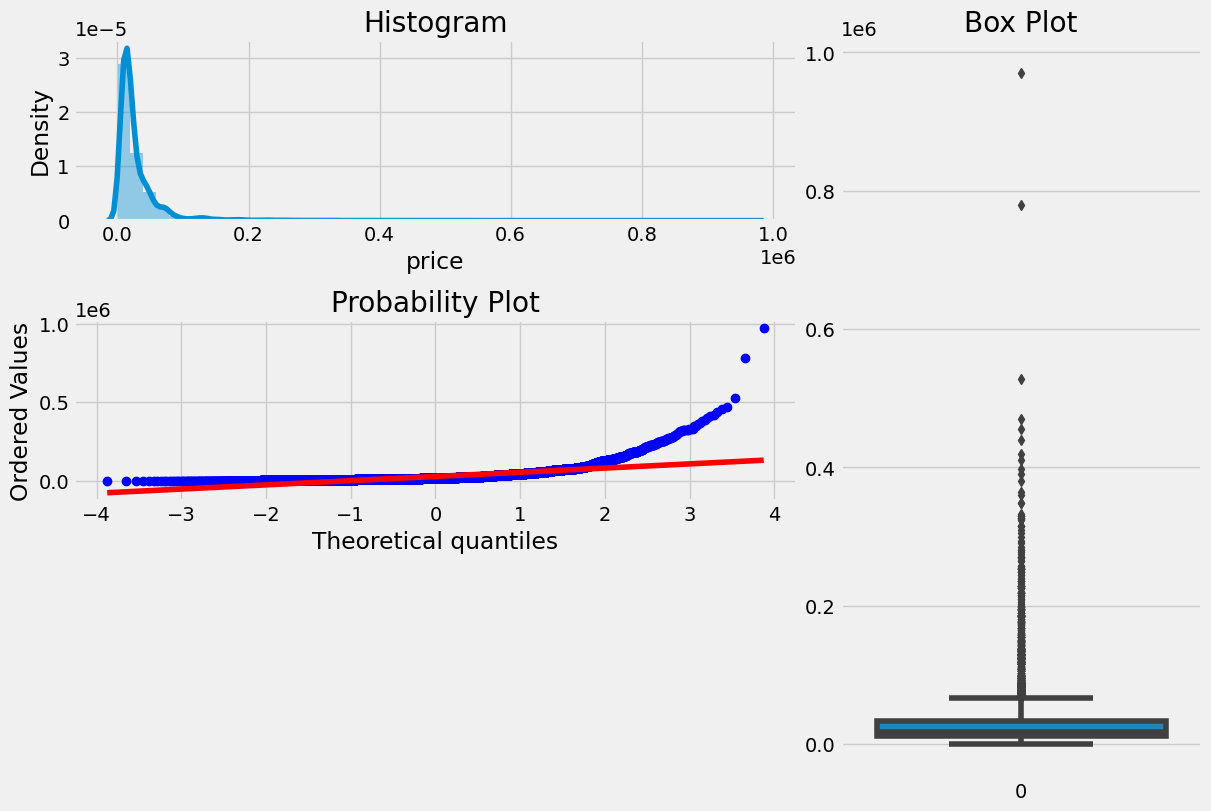

In [39]:
plotting_3_chart(df, 'price')

In [40]:
df['price'].agg(['min', 'mean', 'median','max','std', 'skew']).to_frame().T

min       mean     median         max        std   skew
price 500.0000 28462.8219 18000.0000 970000.0000 35626.0376 6.0948

#### Insights
1. We can clearly observe that our **Car Price Feature** is hiighly right skew and can be problematic for some machine learning algorithms, as they can lead to **biased models** and inaccurate predictions.
2. We can clearly observe there is a significant difference between **mean** & **median values**.
3. We can also that the **skewness of the car price is above 1.5** which mean that the data point are **highly spreed.**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.2"></a>
## <span style="color:#e76f51;">  Feature Distribution of Categorical Features </span>

### 2. Visualizing Total No. of cars sold by different company. 

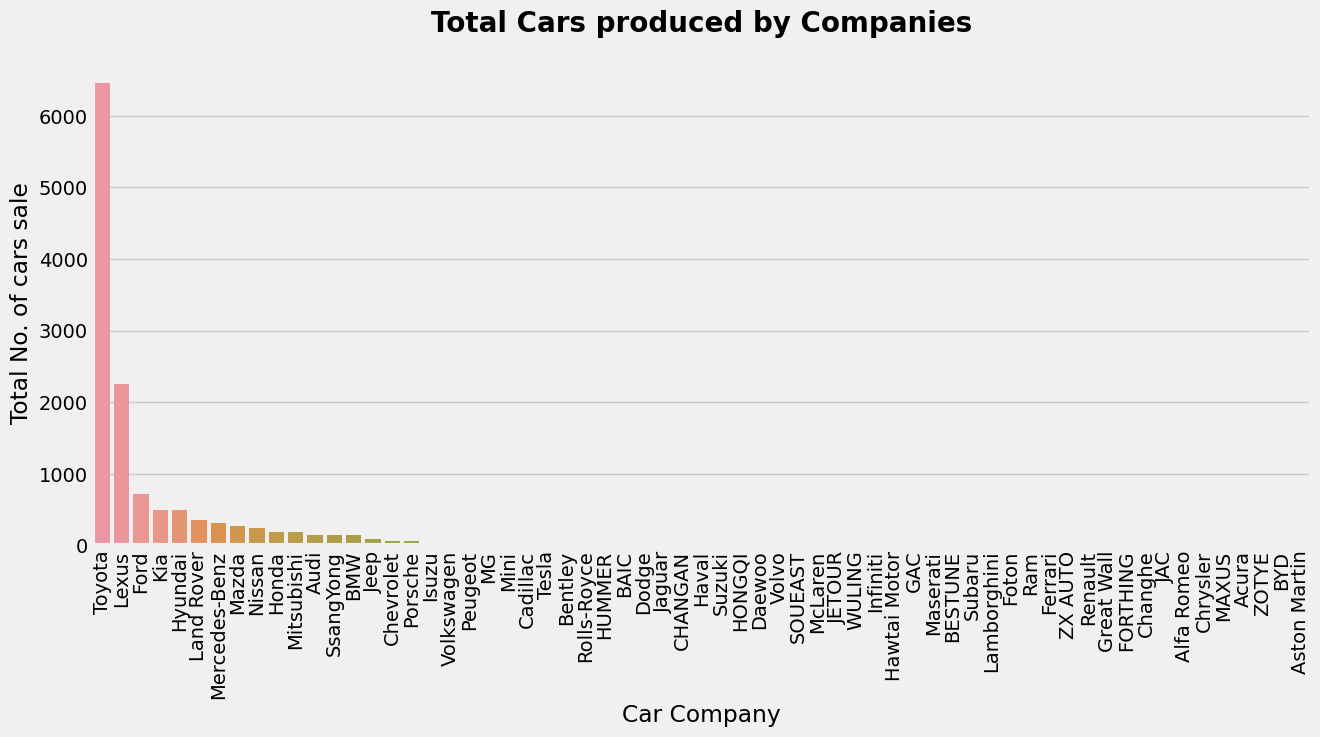

In [41]:
plt.figure(figsize = (14, 6))
counts = df['brand'].value_counts()
sns.barplot(x = counts.index, y = counts.values)
plt.xlabel('Car Company')
plt.ylabel('Total No. of cars sale')
plt.title('Total Cars produced by Companies', pad = 20, fontweight = 'black', fontsize = 20 )
plt.xticks(rotation = 90)
plt.show()

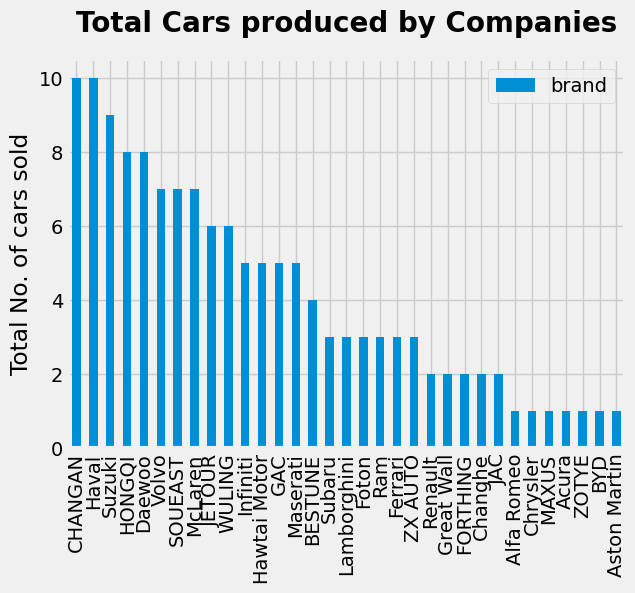

In [42]:
df_brand = pd.DataFrame(df['brand'].value_counts())

df_brand[df_brand['brand']<= 10].plot(kind = 'bar')
plt.ylabel('Total No. of cars sold')
plt.title('Total Cars produced by Companies', pad = 20, fontweight = 'black', fontsize = 20 )
plt.show()

#### Insights
1. **Toyota** company has sale the highest number of cars.
2. So we can say that **Toyota** is kind of customers most favoured campany.
3. **MAXUS, Chrysler, Alfa Romeo, Acura, ZOTYE, BYD, and Aston Martin** are having very low data-points. So we can't make any inference of least salse car companies.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 3. Visualizing Car Company with Price. 

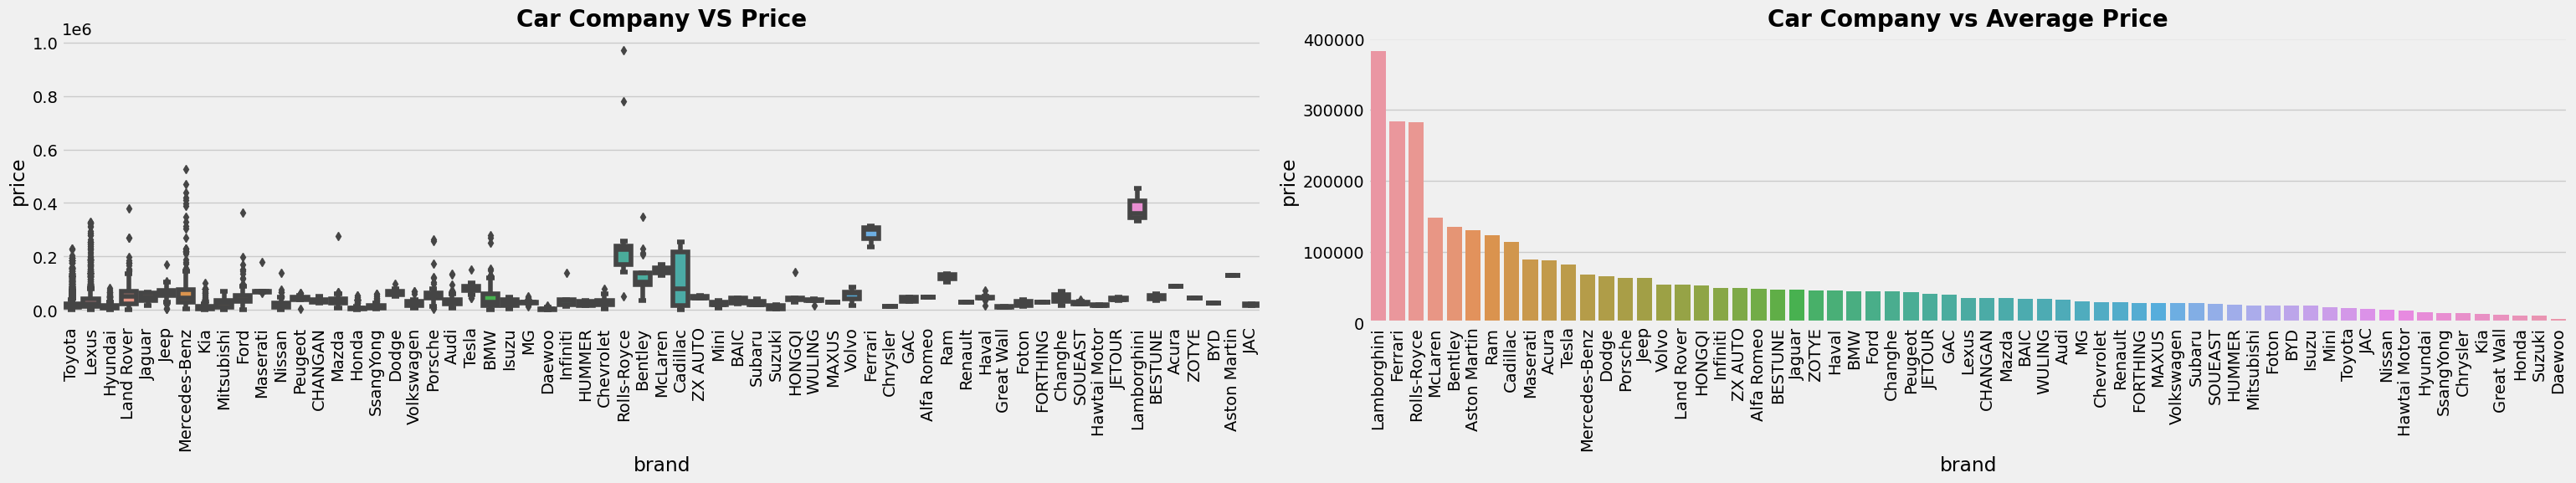

In [43]:
plt.figure(figsize = (int(len(df['brand'].value_counts().values.tolist())/2), 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'brand', y = 'price', data = df)
plt.xticks(rotation = 90)
plt.title('Car Company VS Price', pad = 10, fontweight = 'black', fontsize = 20)

plt.subplot(1, 2, 2)
x = pd.DataFrame(df.groupby('brand')['price'].mean().sort_values(ascending = False))
sns.barplot(x = x.index, y = 'price', data = x)
plt.xticks(rotation = 90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

In [44]:
check_correlation('brand', 'price', df)

                      sum_sq         df       F  PR(>F)
brand     4149145789218.8403    62.0000 70.0349  0.0000
Residual 12400142809502.4395 12977.0000     NaN     NaN


There is a significant linear relationship between the brand variable and the price variable.


#### Insights
1. **Lamborghini, Farrari, and Rolls-Royce** seems to have price range cars.
2. Car campanies like **Daewoo** & **Suzuki** are having a little bit in our dataset.
3. So we can't make any inference related to lowest price range car companies.

#### Note
- Sine there are too many categories in car company feature. So we can derive a new feature **Campany Price Range** which will show the price range as **Low Range, Medium Range, Hight Range**.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 4. Visualizing Car Fuel Type Feature 

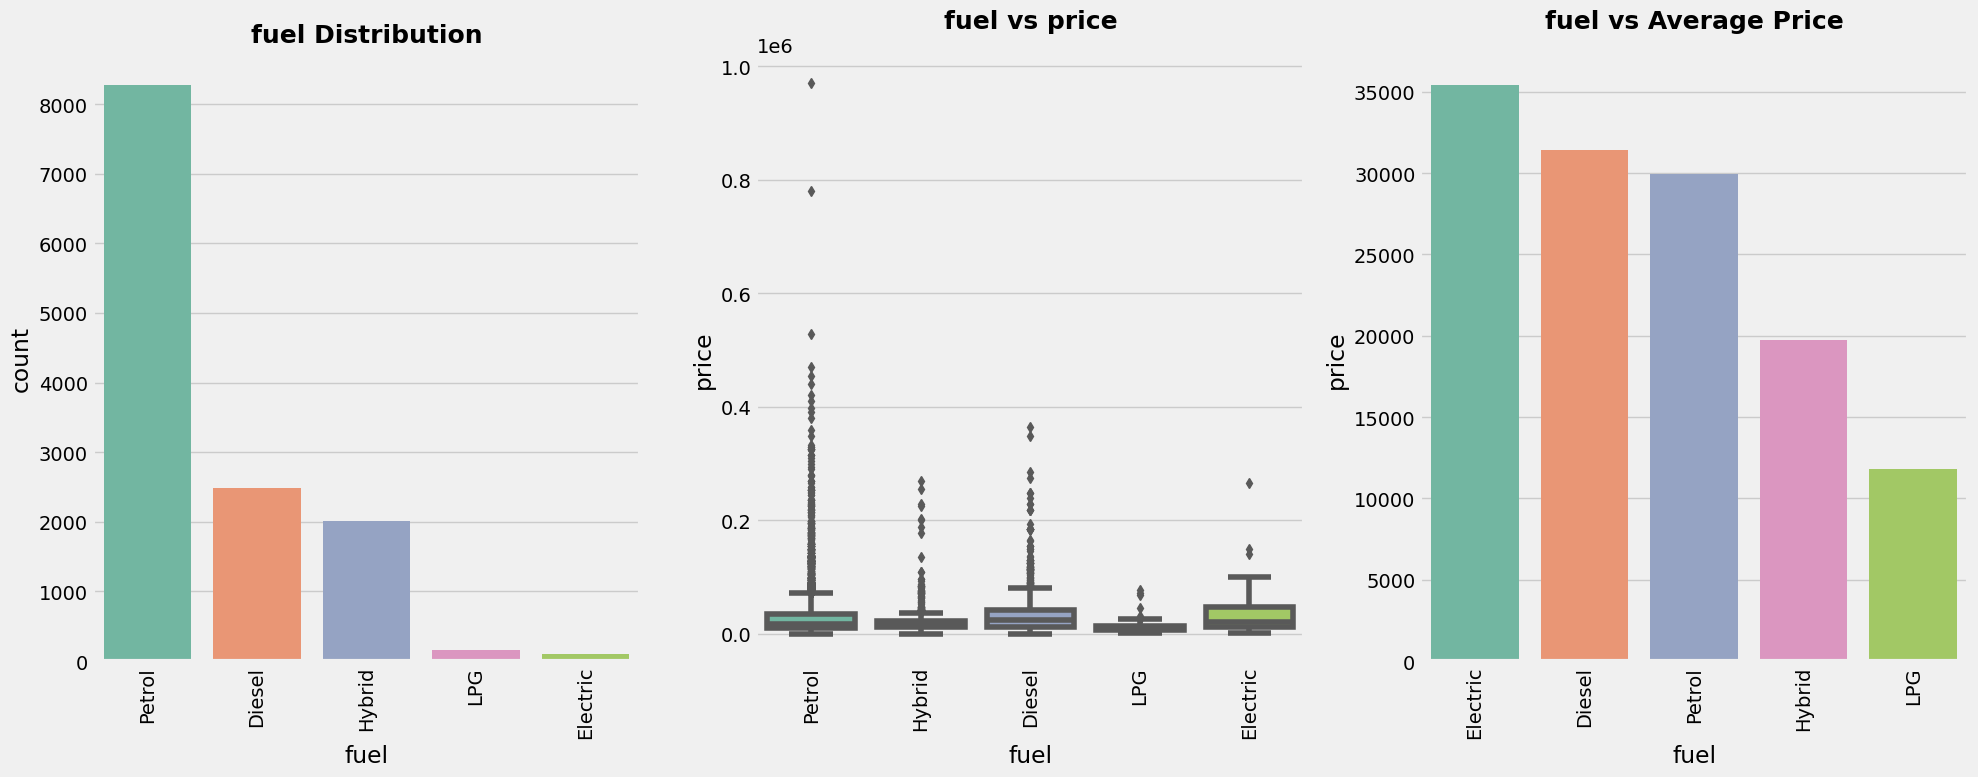

In [45]:
categorical_visualization("fuel", 'price')

#### Insights
1. We can clearly make an insight that **Cars having petrol fuel systme** is mostly sold.
2. From the second plot we can make insight that **Petrol Fuel System cars** are availabe within every **price range**.
3. From the third plot we can make an insight the **Average price of petrol fuel type cars are less than diesl fuel type cars**.

In [46]:
check_correlation('fuel', 'price', df)

                      sum_sq         df       F  PR(>F)
fuel       243127664187.1208     4.0000 48.5885  0.0000
Residual 16306160934617.0488 13035.0000     NaN     NaN


There is a significant linear relationship between the fuel variable and the price variable.


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 5. Visualizing Tax Type 

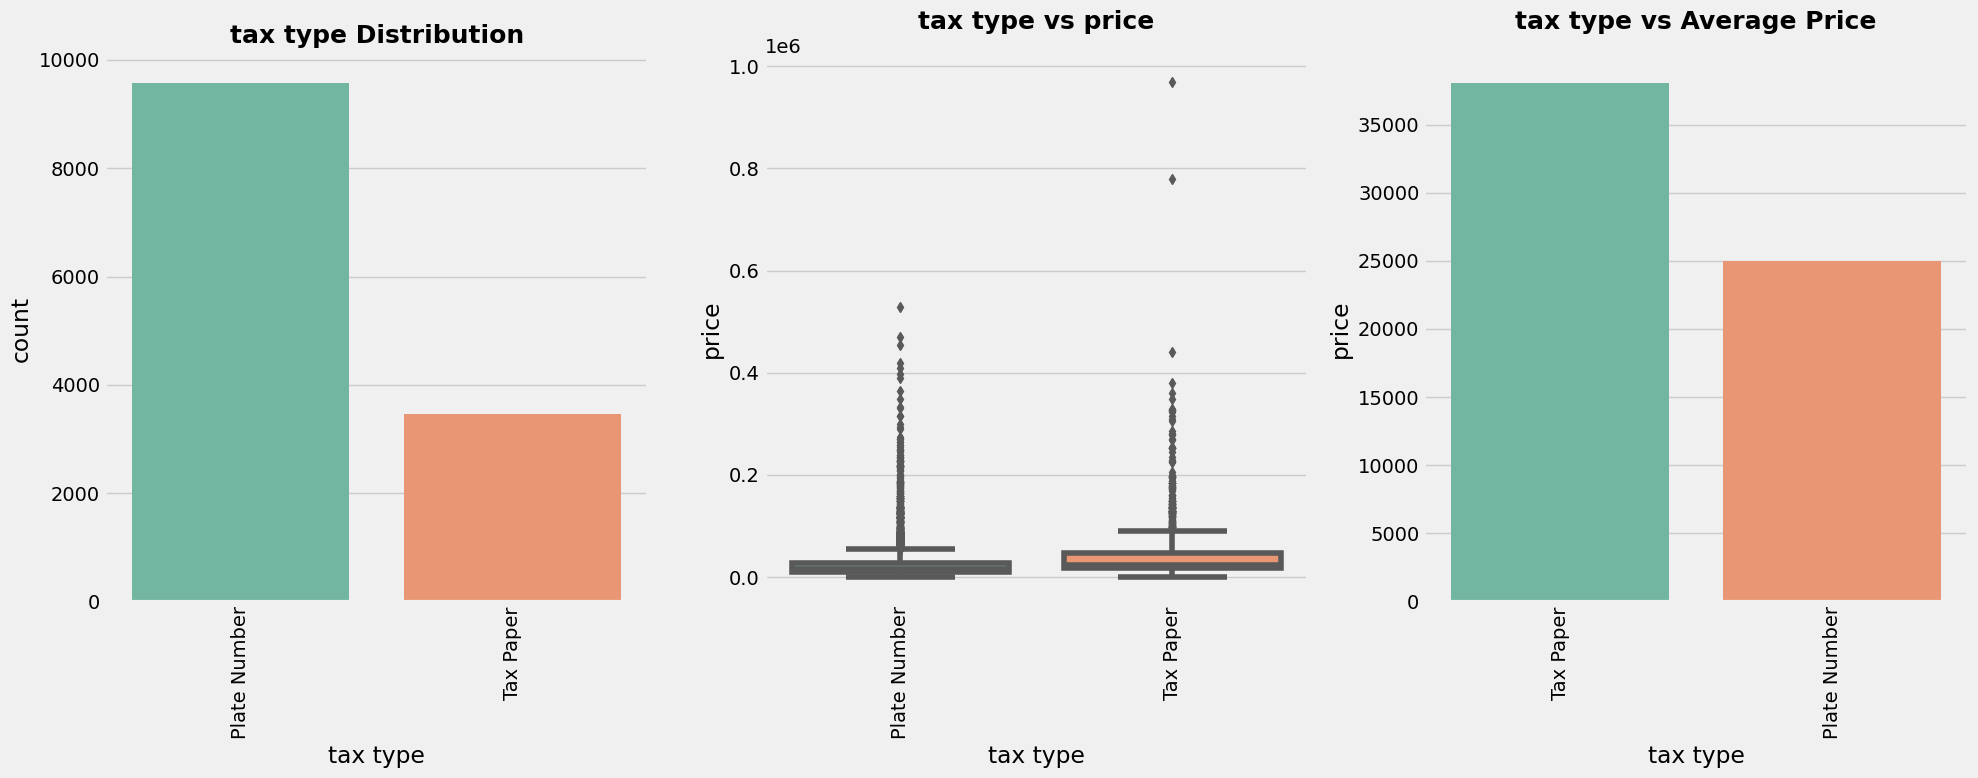

In [47]:
categorical_visualization('tax type', 'price')

#### Observation
1. Cars **Plate Number** are mostly sale when compared with cars **Tax Paper**.
2. Cars **Tax Paper** are more expansive than Cars **Plate Number**.

#### Insights
1. Outliers present in both.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 6. Visualizing  Conditon Feature

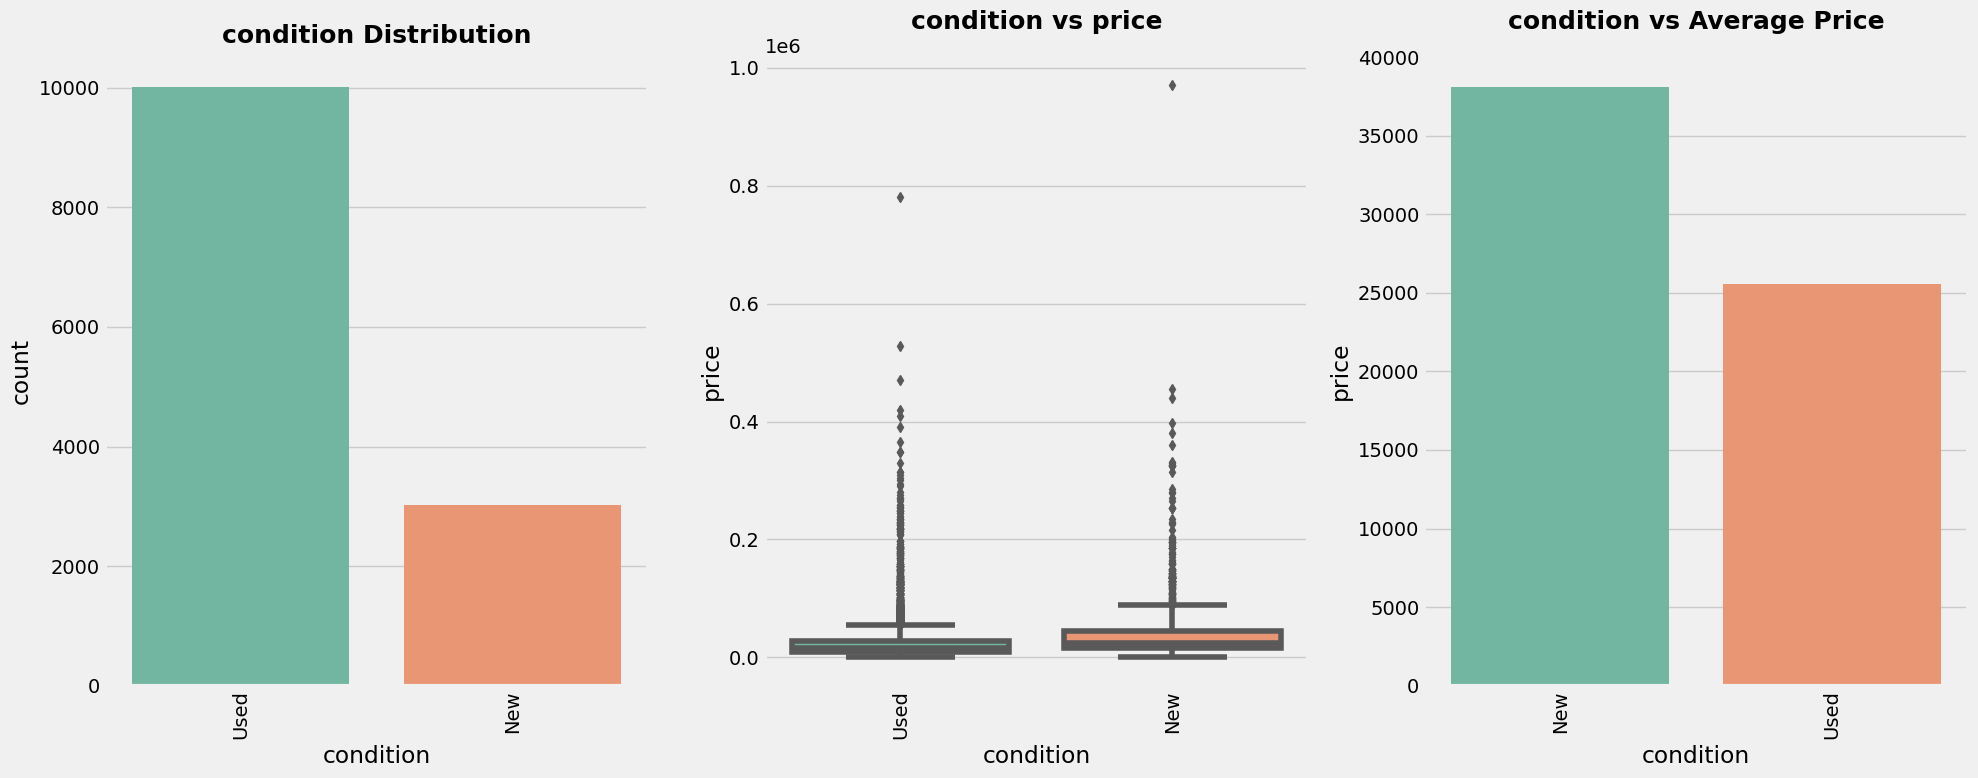

In [48]:
categorical_visualization('condition', 'price')

In [49]:
check_correlation('condition', 'price', df)

                       sum_sq         df        F  PR(>F)
condition   366373802411.8281     1.0000 295.1744  0.0000
Residual  16182914796392.3242 13038.0000      NaN     NaN


There is a significant linear relationship between the condition variable and the price variable.


#### Observation
1. The website has **cars used** more than **cars new**
2. **Cars New** are higher average price than **Car used**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 7. Visualizing Body Type Feature

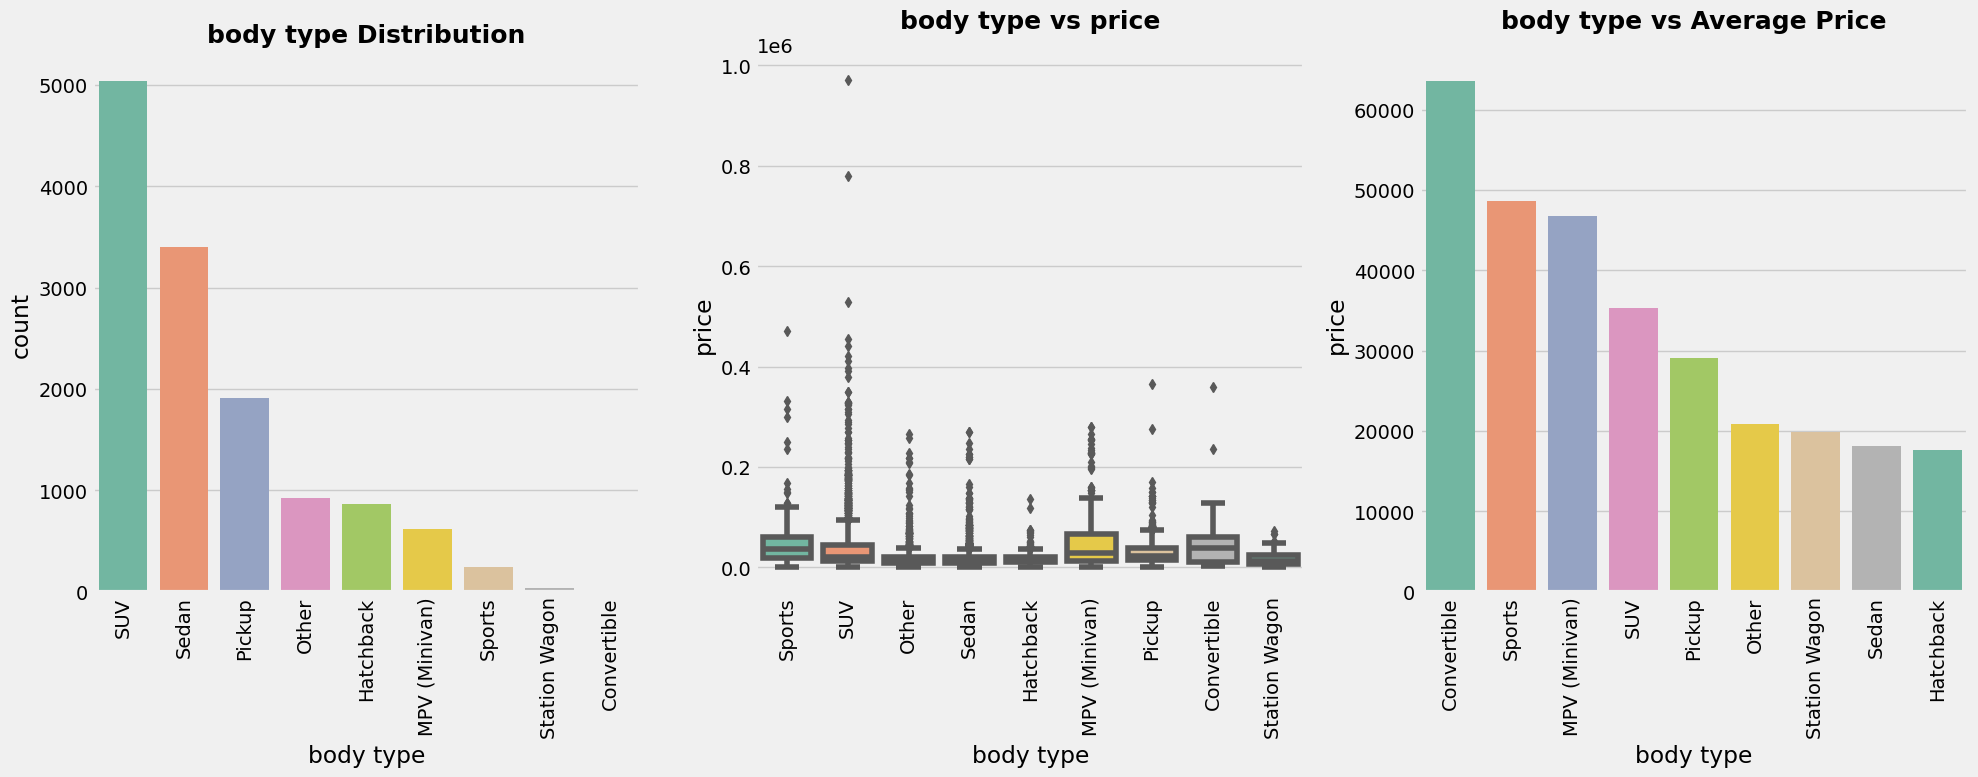

In [50]:
categorical_visualization('body type', 'price')

#### Obseration
1. Cars having **SUV** body-type are mostly salse followed by **Sedan**.
2. Cars having **converitble** or **hardtop** body-type are less salse.
3. Cars having **Converitble** body-type is the mostly expensive cars foolowed by **sport**.

#### Insights
1. **Convertible** & **Sport** body-type are less salse because they are very expensive cars. So most of the customers couldn't prefer it.
2. Car having **SUV** body-type is the fourth most expensive car. But still its having the most number of cars sales. So we can say customer prefer **medium price range cars**.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 8. Visualizing Transmission Feature 

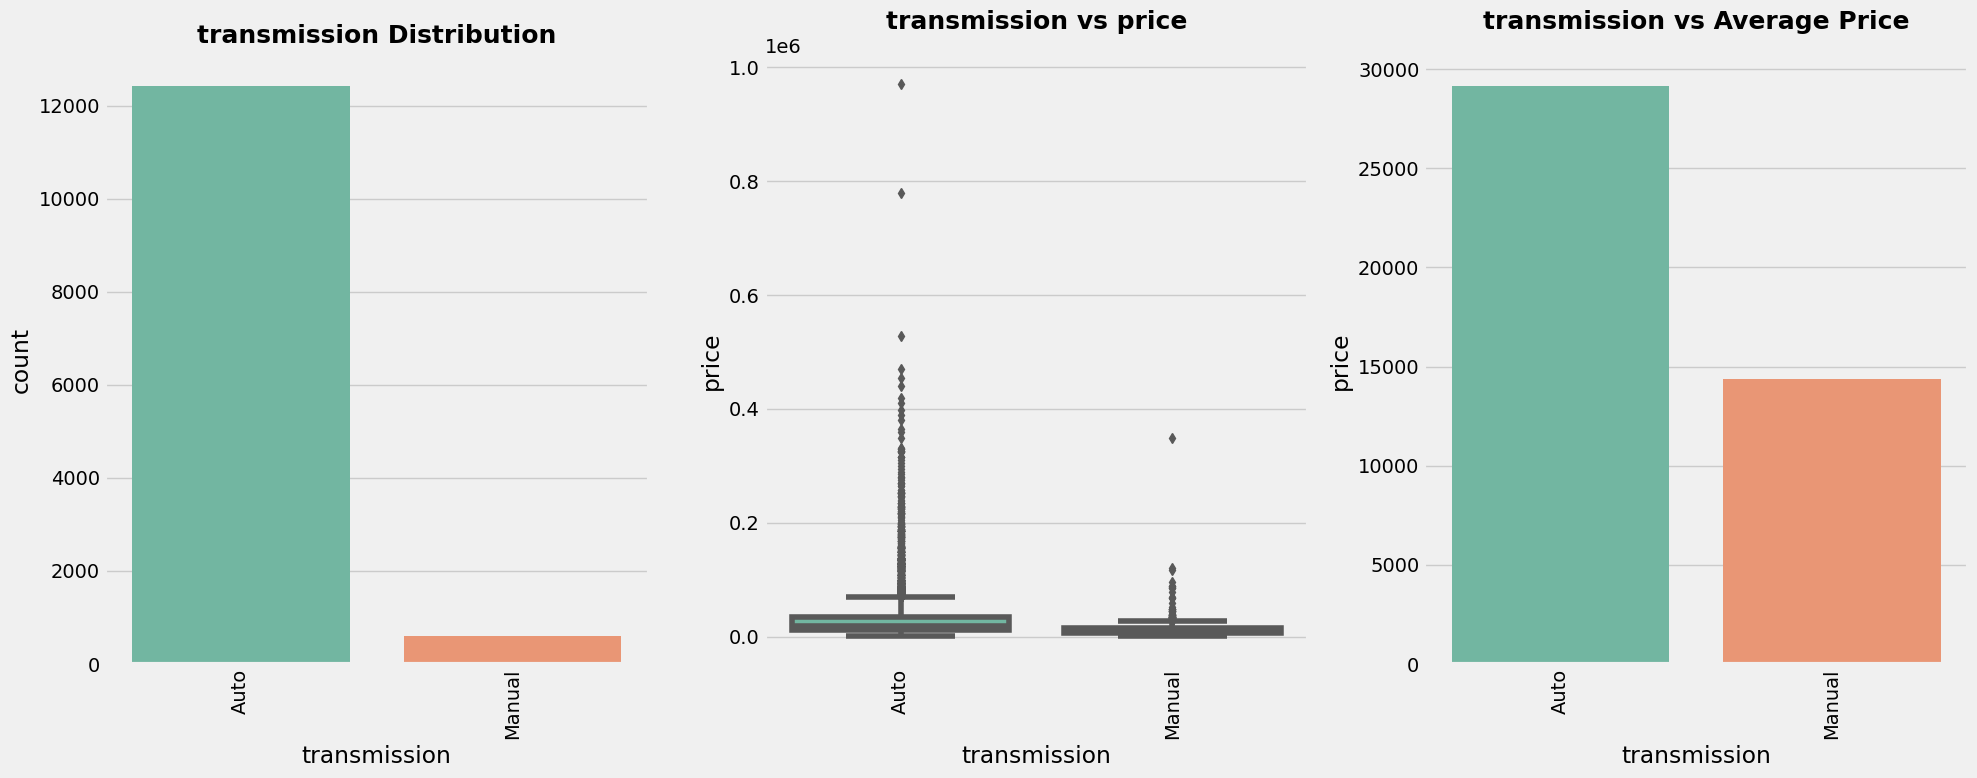

In [51]:
categorical_visualization('transmission', 'price')

In [52]:
check_correlation('transmission', 'price', df)

                          sum_sq         df        F  PR(>F)
transmission   127758346743.8719     1.0000 101.4347  0.0000
Residual     16421530252060.2871 13038.0000      NaN     NaN


There is a significant linear relationship between the transmission variable and the price variable.


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 9. Visualizing Color Feature 

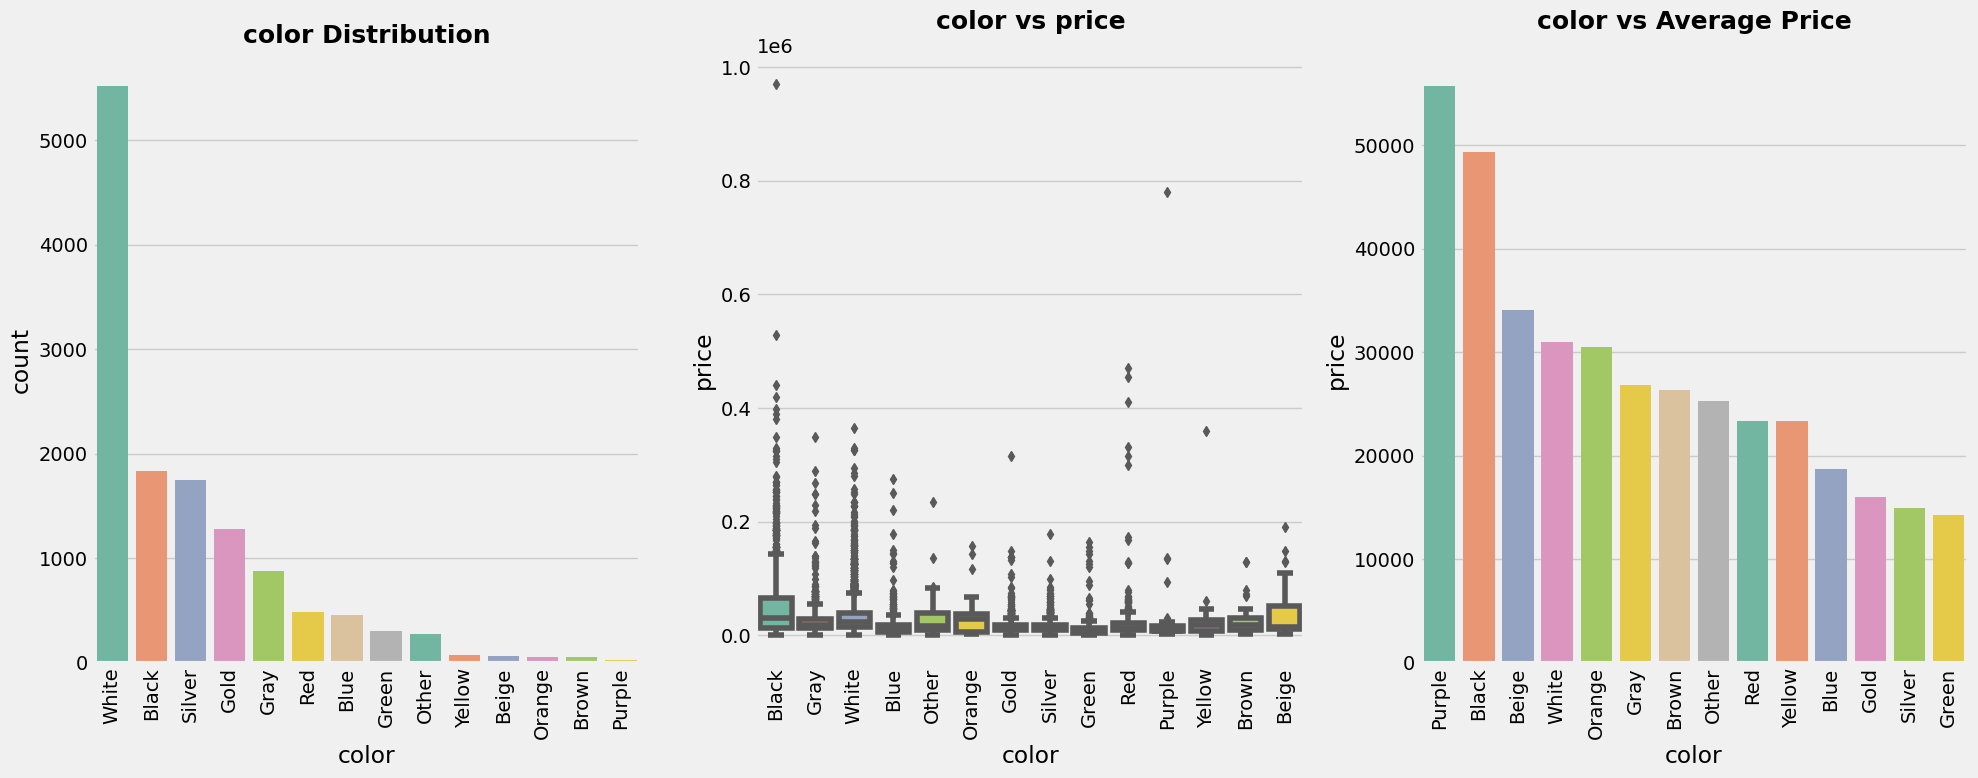

In [53]:
categorical_visualization('color', 'price')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 10. Visualizion Car Models Features 

In [54]:
# # Set up the plot
# fig, ax = plt.subplots(figsize=(20, 90))

# # Create a horizontal boxplot
# sns.boxplot(x='price', y='model', data=df, orient='h', ax=ax)

# # Sort the categories by median price
# medians = df.groupby(['model'])['price'].median().sort_values()
# category_order = medians.index.tolist()
# ax.set_yticklabels(category_order)

# # Add labels and adjust margins
# ax.set_xlabel('Price')
# ax.set_ylabel('Car Model')
# ax.set_title('Car Company VS Price', pad=10, fontweight='black', fontsize=20)
# plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.1)

# plt.show()

Text(0.5, 1.0, 'Car Company VS Price')

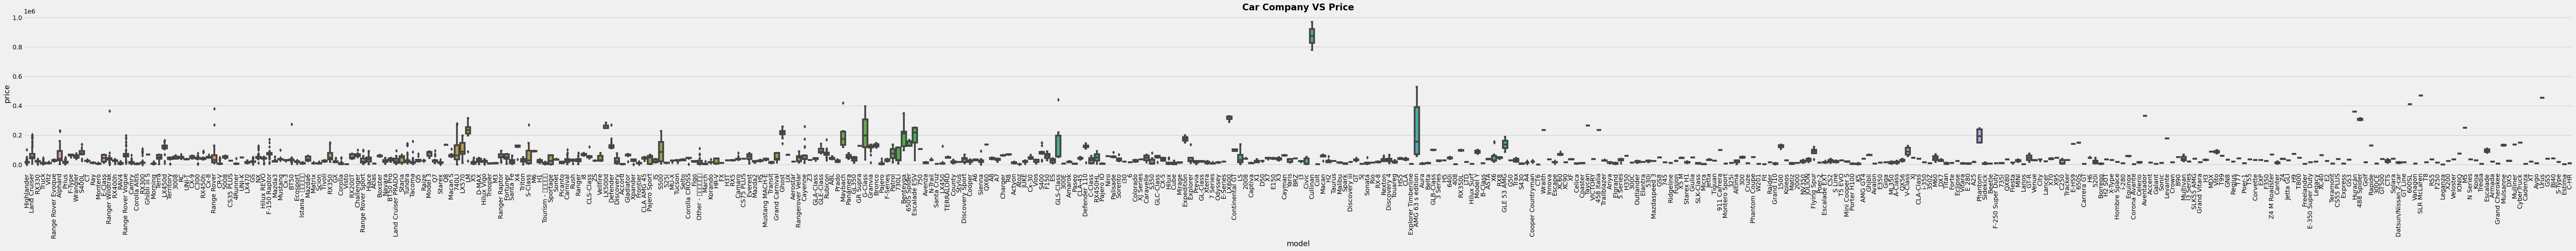

In [55]:
plt.figure(figsize = (200, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'model', y = 'price', data = df, orient= 'v')
plt.xticks(rotation = 90)
plt.title('Car Company VS Price', pad = 10, fontweight = 'black', fontsize = 20)

In [56]:
check_correlation('model', 'price', df)

                      sum_sq         df       F  PR(>F)
model    12091370872051.7109   461.0000 74.0038  0.0000
Residual  4457917726746.1377 12578.0000     NaN     NaN


There is a significant linear relationship between the model variable and the price variable.


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 11. Visualizing Car Location Features 

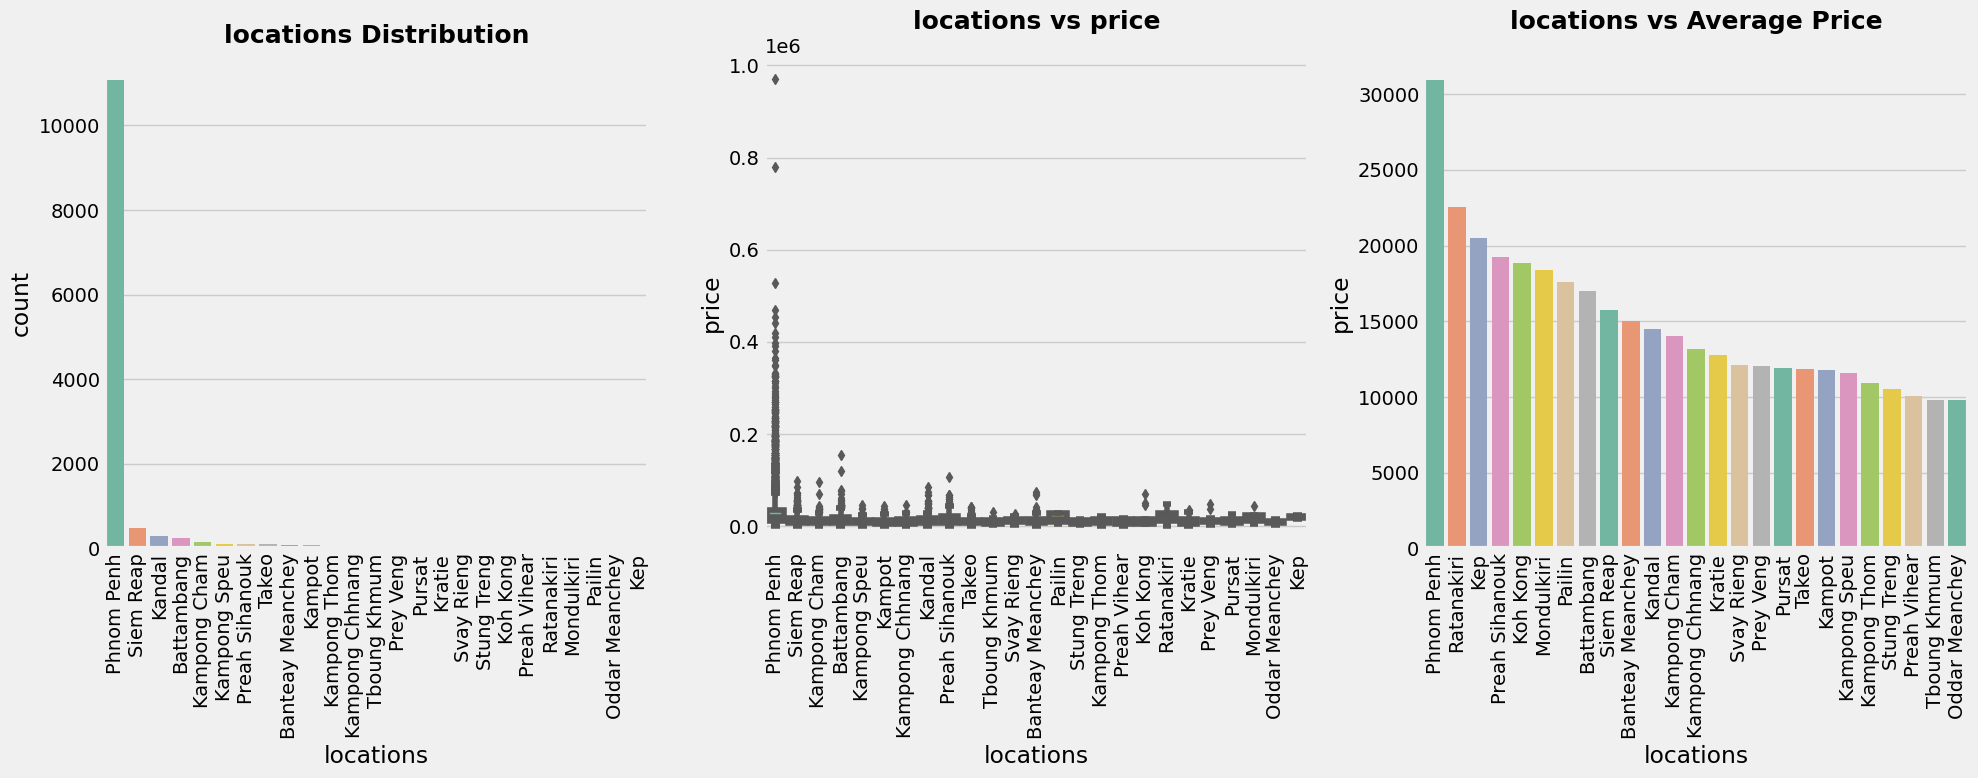

In [57]:
categorical_visualization('locations', 'price')

<a id="4.3"></a>
## <span style="color:#e76f51;">Continuos and Continous Data Distribution </span>

### 12. Visualizing `Year` Feature 

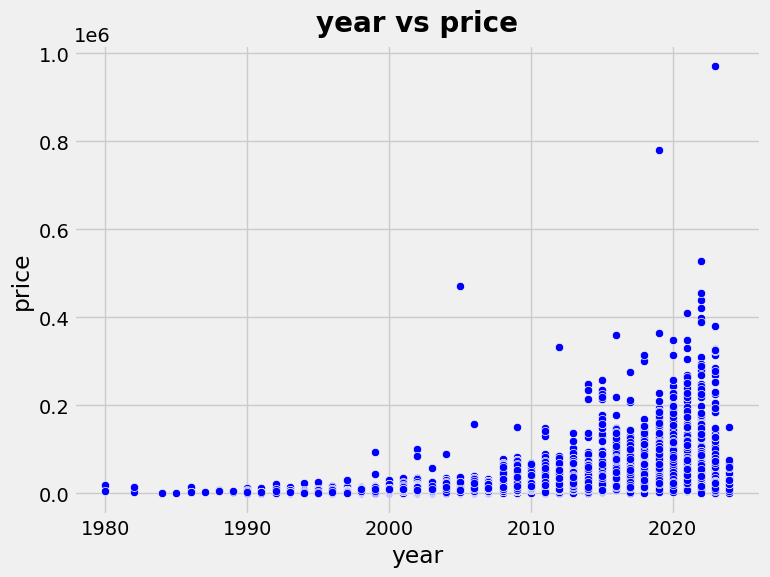

In [58]:
scatter_plot(['year'], 'price', df)

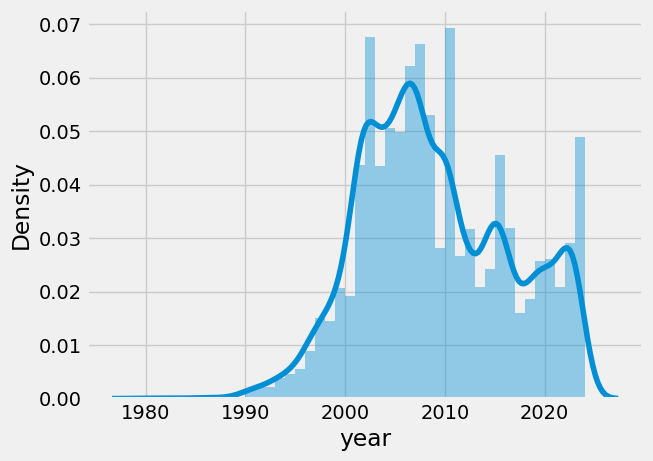

In [59]:
sns.distplot(df['year'])
plt.show()

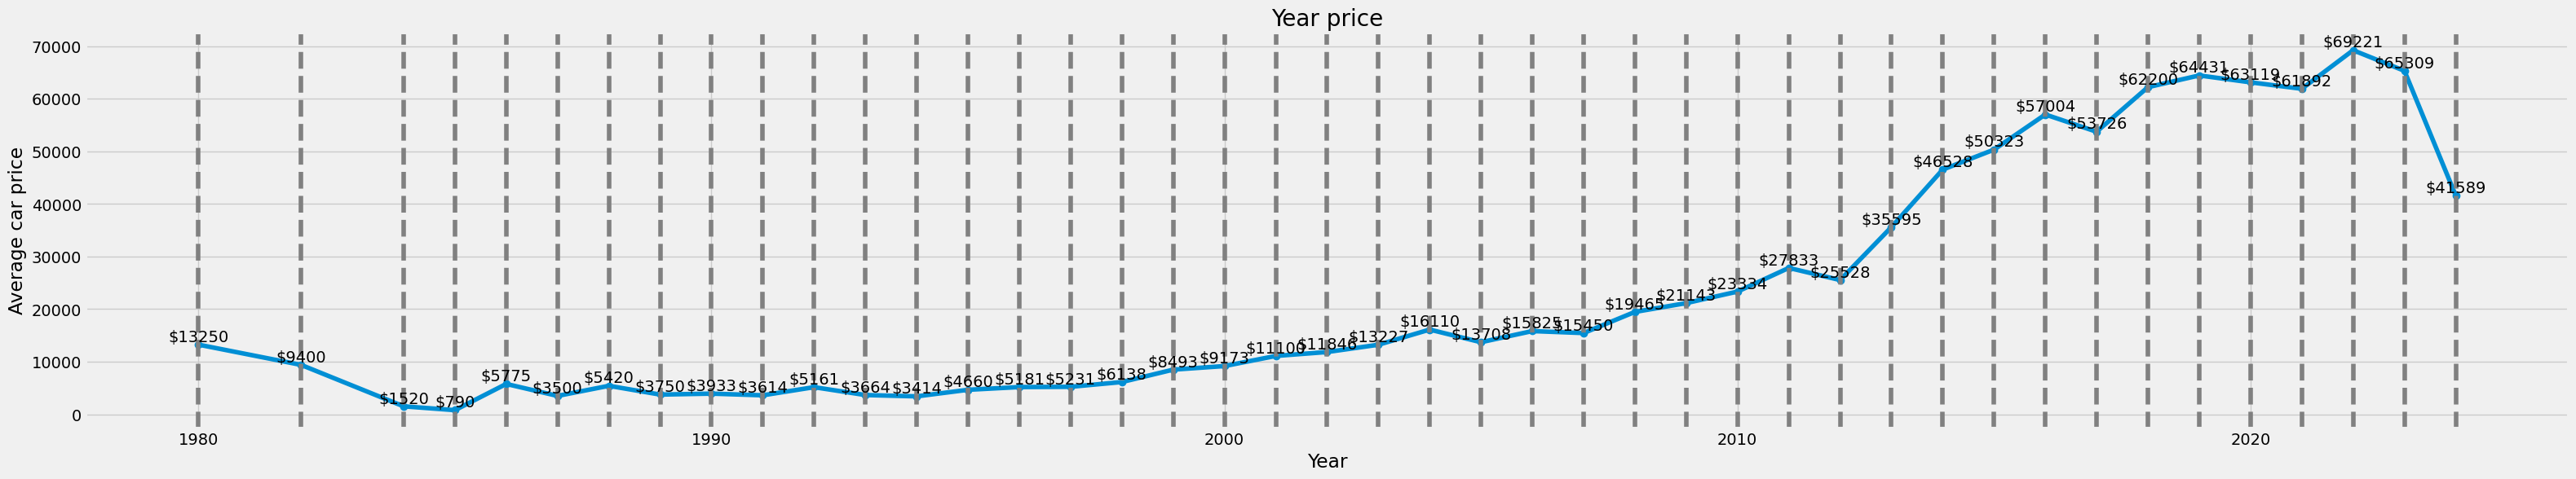

In [60]:
plt.figure(figsize=(35, 6))
mean_prices = df.groupby('year')['price'].mean()

# Create a line plot with markers
mean_prices.plot(marker='o')

# Add labels to the x-axis and y-axis
plt.xlabel('Year')
plt.ylabel('Average car price')
plt.title('Year price')

# Add text labels to each data point
for year, price in mean_prices.iteritems():
    plt.text(year, price, f"${price:.0f}", ha='center', va='bottom')
    plt.axvline(x=year, color='gray', linestyle='--')

plt.show()

#### Observation
 * The average prices seem to have increase from year 2012 to 2022

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 10. List of all the useful Feature

**List of all the useful Categorical Features.**
1. Location
2. Car Makes
3. Car Model
4. Tax Type
5. Condition
6. Body Type
7. Fuel
8. Transmission
9. Color

**List of all the useful Numerical Features.**
* Year
* Price

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.5"></a>
## <span style="color:#e76f51;">  Correlation matrix </span>

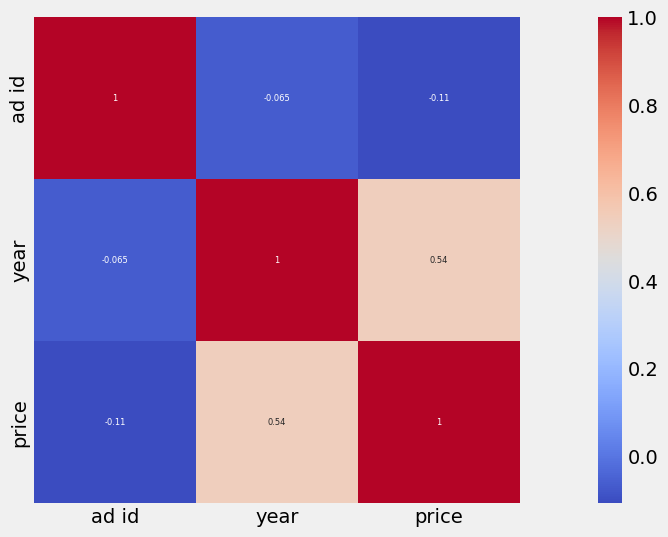

In [61]:
# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(18,6))

sns.heatmap(cars.corr(), annot= True, square=True, ax = ax, cbar= True, annot_kws={"fontsize": 6}, cmap='coolwarm')
plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '4.6'><span>Feature Engineering</span></a>
</p>
</div>

### 1. Deriving New Features From "Cars Makes" Feature. 

* As we made an insight above that we can split the car company name into different price ranges.Like **Low Range, Medium Range, High Range** cars.

In [62]:
data_comp_avg_price = df[['brand','price']].groupby('brand', as_index = False).mean().rename(columns={'price':'brand_avg_price'})

df = df.merge(data_comp_avg_price, on= 'brand')

data_comp_avg_price.describe()

brand_avg_price
count          63.0000
mean        57110.1663
std         67049.0065
min          4761.2500
25%         24600.9086
50%         35267.7476
75%         53636.8752
max        382333.3333

**Note**
* In above output we fetched the **average price of each individual car companies**
* Now we have to add this average values a new column in our datset.

In [63]:
df['brand_category'] = df['brand_avg_price'].apply(lambda x : "Budget" if x < 30000 
                                                     else ("Mid_Range" if 30000 <= x < 50000
                                                           else "Luxury"))

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

---

In [64]:
car_make_Budget = pd.DataFrame(df[df['brand_category'] == 'Budget']['brand'].value_counts()).index.to_list()

car_model_Budget = df[df['brand'].apply(lambda x: x in car_make_Budget)]['model'].value_counts().index.to_list()

df_Budget = pd.DataFrame(df[df['brand'].apply(lambda x: x in car_make_Budget)].groupby(['brand'])['model'].value_counts()).rename(columns={'model': 'Count Number'}).reset_index(level =1)

insight_range_price(car_make_Budget, car_model_Budget, df_Budget, 'Budget')


The total number of Car brands and Car models in range of Budget prices 217
The total number of Car brands in range of Budget prices 26
The total number of Car models in range of Budget prices 210


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

---

In [65]:
car_make_Medium = pd.DataFrame(df[df['brand_category'] == 'Mid_Range']['brand'].value_counts()).index.to_list()

car_model_Medium = df[df['brand'].apply(lambda x: x in car_make_Medium)]['model'].value_counts().index.to_list()

df_model_Medium = pd.DataFrame(df[df['brand'].apply(lambda x: x in car_make_Medium)].groupby(['brand'])['model'].value_counts()).rename(columns={'model': 'Count Number'}).reset_index(level =1)


insight_range_price(car_make_Medium, car_model_Medium, df_model_Medium, 'Medium')


The total number of Car brands and Car models in range of Medium prices 154
The total number of Car brands in range of Medium prices 19
The total number of Car models in range of Medium prices 153


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

---

In [66]:
car_make_Highend= pd.DataFrame(df[df['brand_category'] == 'Luxury']['brand'].value_counts()).index.to_list()

car_model_Highend = df[df['brand'].apply(lambda x: x in car_make_Highend)]['model'].value_counts().index.to_list()

df_Highend = pd.DataFrame(df[df['brand'].apply(lambda x: x in car_make_Highend)].groupby(['brand'])['model'].value_counts()).rename(columns={'model': 'Count Number'}).reset_index(level =1)

insight_range_price(car_make_Highend, car_model_Highend, df_Highend, 'Luxury')


The total number of Car brands and Car models in range of Luxury prices 107
The total number of Car brands in range of Luxury prices 18
The total number of Car models in range of Luxury prices 107


---

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 5. Detect unkown values 

In [67]:
index = check_column_value(df, ['Other', 'Other - ផ្សេងៗ', 2024])

df.drop(index, axis= 0, inplace=True)

df.shape

Columns that contain the ['Other', 'Other - ផ្សេងៗ', 2024]:

model         [0, 53, 0]
year          [0, 0, 82]
body type    [921, 0, 0]
color        [274, 0, 0]
dtype: object


(11791, 13)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 2. Create new feature to correct year 

In [68]:
from datetime import datetime

# Get the current year
current_year = datetime.today().year

life_span = df['year'].apply(lambda x: current_year-x).values.tolist()

df['lifespan'] = life_span

df.drop(columns=['year'], inplace=True)

df['lifespan'] = df['lifespan'].astype(int)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 3. <a id ='4.6.1'>Data transforming </a>

Statistics=157.803, p=0.000
Do boxcox transfrom, the price does not look Gaussian (reject H0)


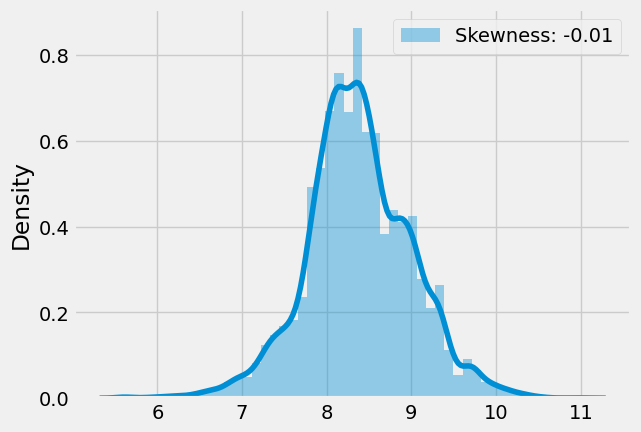

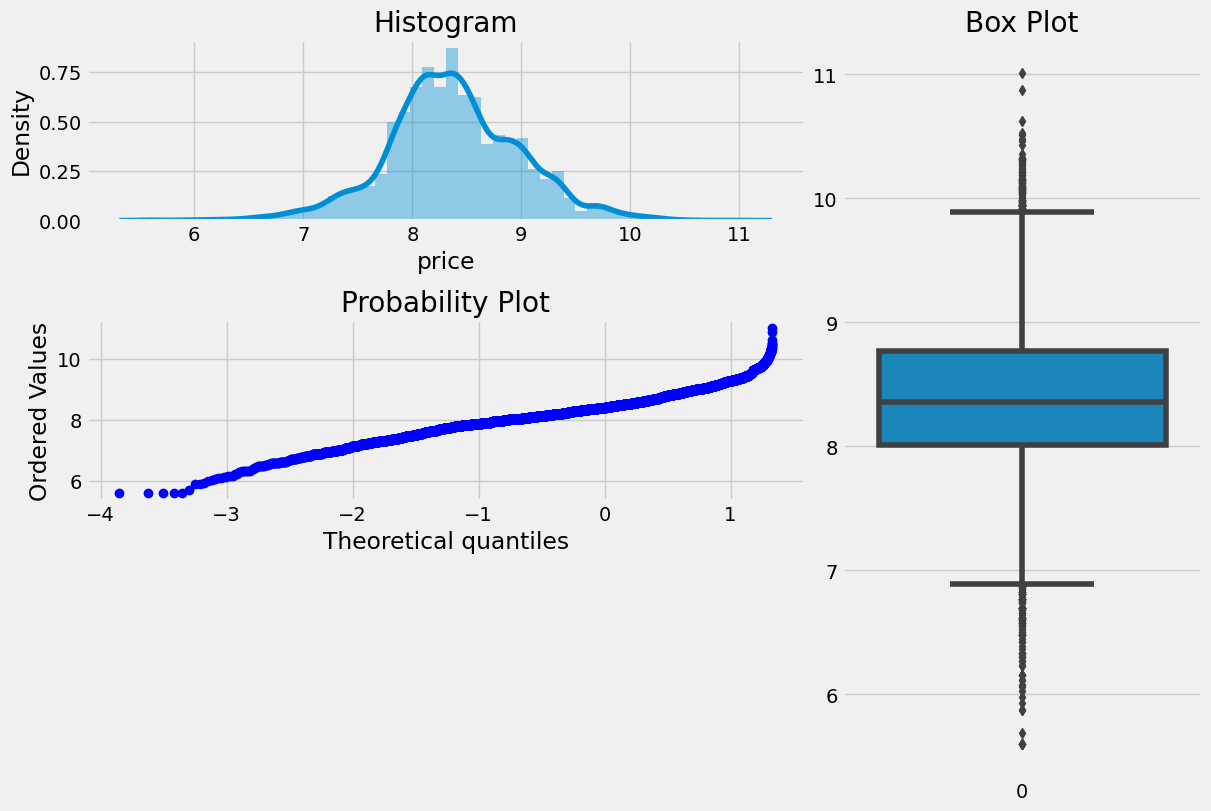

In [69]:
price_bc, lambda_bc = boxcox_transform(df, 'price')
df_ts = df.copy()
df_ts['price'] = price_bc
plotting_3_chart(df_ts, 'price')

Statistics=170.355, p=0.000
Do log transfrom, the price does not look Gaussian (reject H0)


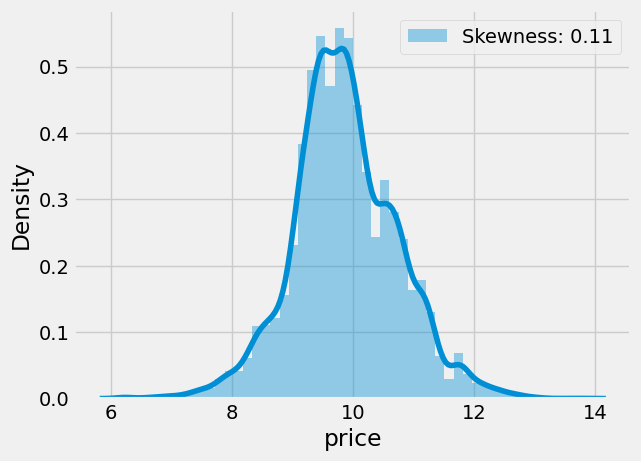

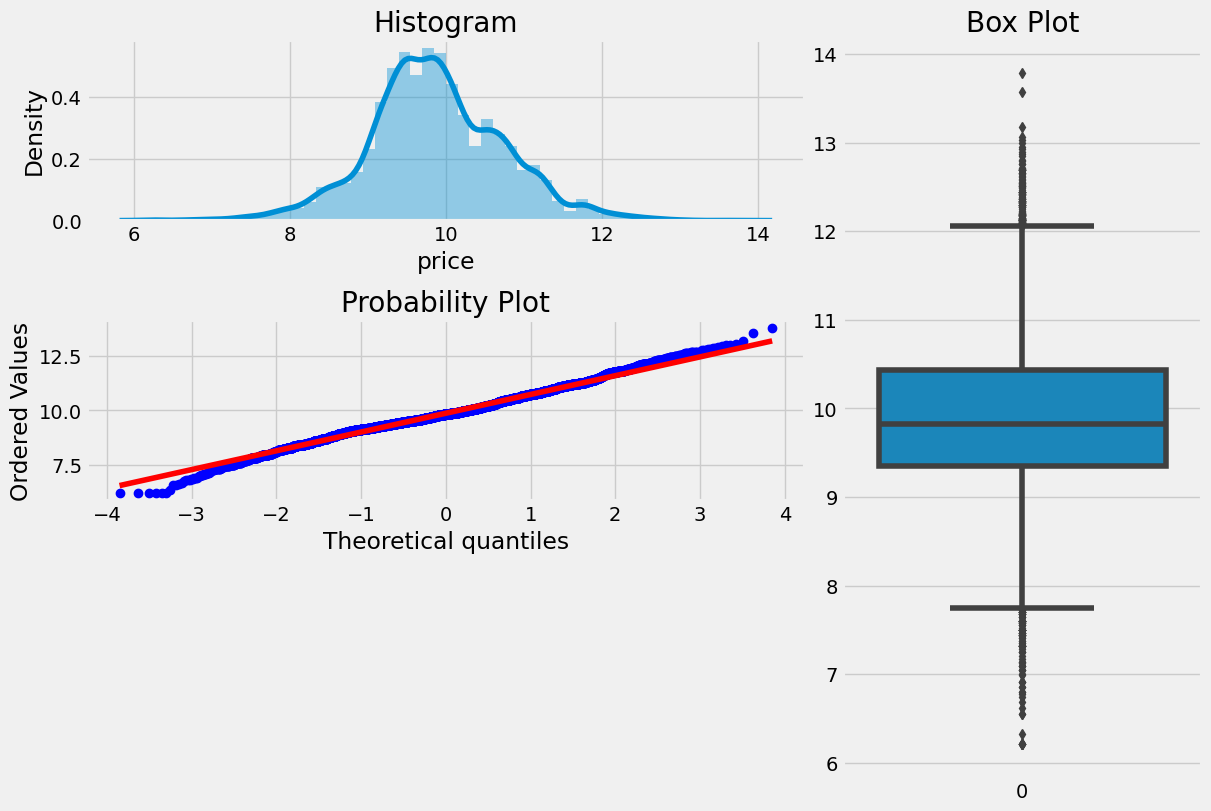

In [70]:
log_price = log_ts(df, 'price')
df_ts = df.copy()
df_ts['price'] = log_price
plotting_3_chart(df_ts, 'price')

Statistics=5329.905, p=0.000
Do sqare root transfrom, the price does not look Gaussian (reject H0)


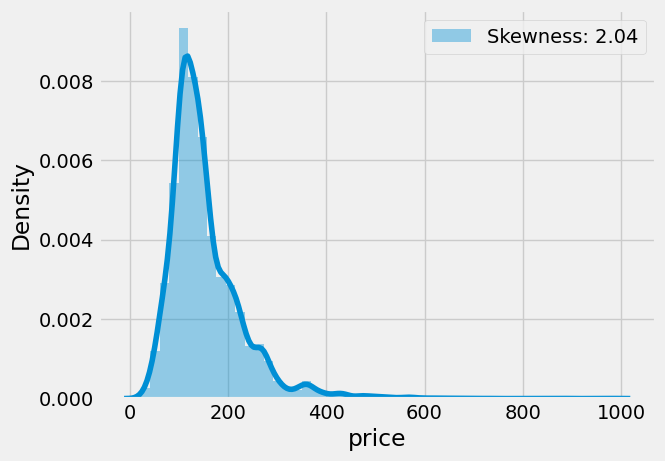

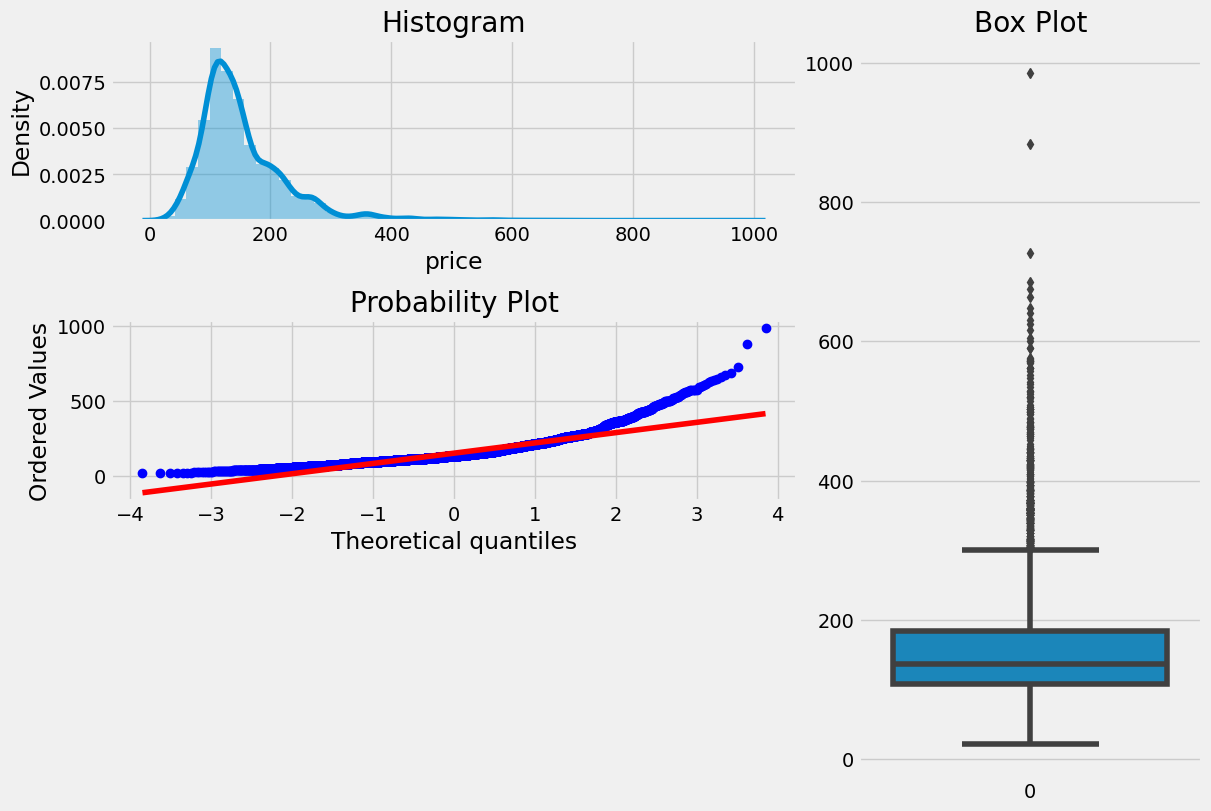

In [71]:
sqrt_price = sqrt_ts(df, 'price')
df_ts = df.copy()
df_ts['price'] = sqrt_price
plotting_3_chart(df_ts, 'price')

### 4. Decission Making

In [72]:
# df['price'] = price_bc.values
df['price'] = log_price.values
# df['price'] = sqrt_price.values

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '5'><span>Data Preprocessiong</span></a>
</p>
</div>

### 1. Creating new DataFrame with all the useful Features.

In [73]:
new_data = df.drop(columns=['brand_avg_price'], axis = 1)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 2. <a id = '5.1'>Handling Outliers</a>

The IQR is 2.956521739130438
The lower bound value is 2262.1751394264365
The upper bound value is 172842.49711060687
Total number of outliers are 247


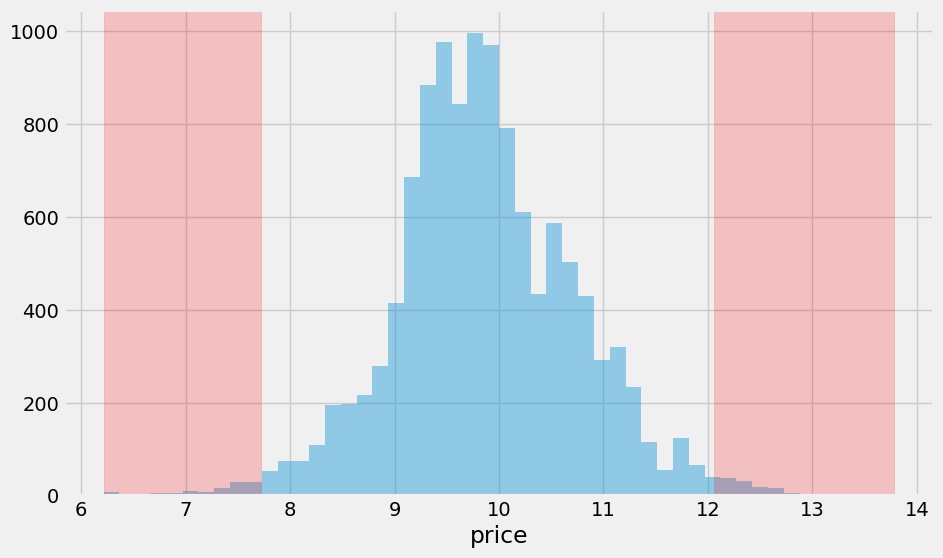

In [74]:
visulize_outlier(new_data, 'price', log= True)

In [75]:
outlier_index = outlier_detection(new_data['price']).index
df_outlier = new_data.loc[new_data.index.isin(outlier_index)]
df_before = new_data.copy()

new_data.drop(outlier_index, axis= 0, inplace = True)
print('Afer drop outliers:', df_before.shape[0],'->', new_data.shape[0], 'Observations')

Afer drop outliers: 11791 -> 11544 Observations


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5.2"></a>
## <span style="color:#e76f51;">Encoding </span>

### 3. One-hot Encoding 

In [76]:
data = new_data.drop(columns=['brand', 'model'], axis = 'columns')

cat_features = data.select_dtypes(include='O').columns.tolist()
data, columns, mapping_lable_dummy = label_encoding(data,threshold =2)

cat_features = [i for i in cat_features if i not in columns]

dummy_data, colunmns_dummy = dummy(data, cat_features)

# dummy_data = scaler_df(dummy_data, ['price'], MinMaxScaler())

X = dummy_data.drop('price', axis = 1)
y = dummy_data.price
# X= scaler_df(X, X.columns.tolist(), RobustScaler())
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 4. Label Encoding

In [77]:
data = new_data.drop(columns=['brand_category'], axis = 1)
data, columns, mapping_lable = label_encoding(data, threshold= 2)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### 5. Target Encoding 

In [78]:
# data = scaler_df(data, ['price'], StandardScaler())
X_train, X_test, y_train, y_test, mapping, target_encoder = target_encodnig(data, 'O', 'price')
X_train, rb_sc_train = scaler_df(X_train, X_train.columns, RobustScaler(), Object= True)
X_test = scaler_df(X_test, X_train.columns, rb_sc_train, from_object= True)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '6'><span>Model Building</span></a>
</p>
</div>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b><a id = '6.1'>1. Linear-Regression </a></b> Model</h2>

In [79]:
from sklearn.linear_model import LinearRegression
adjust_r_square_lm, lm = model_prediction(X_train, X_test, y_train, y_test, LinearRegression(), 'Linear Regression Model',log= True, record=True)

r2_Score of LinearRegression model on Training Data is: 77.59155004547011
r2_Score of LinearRegression model on Testing Data is: 76.59473916209359
MSE of LinearRegression model on Testing Data is: 248941967.62665218


The number of predictors: 10


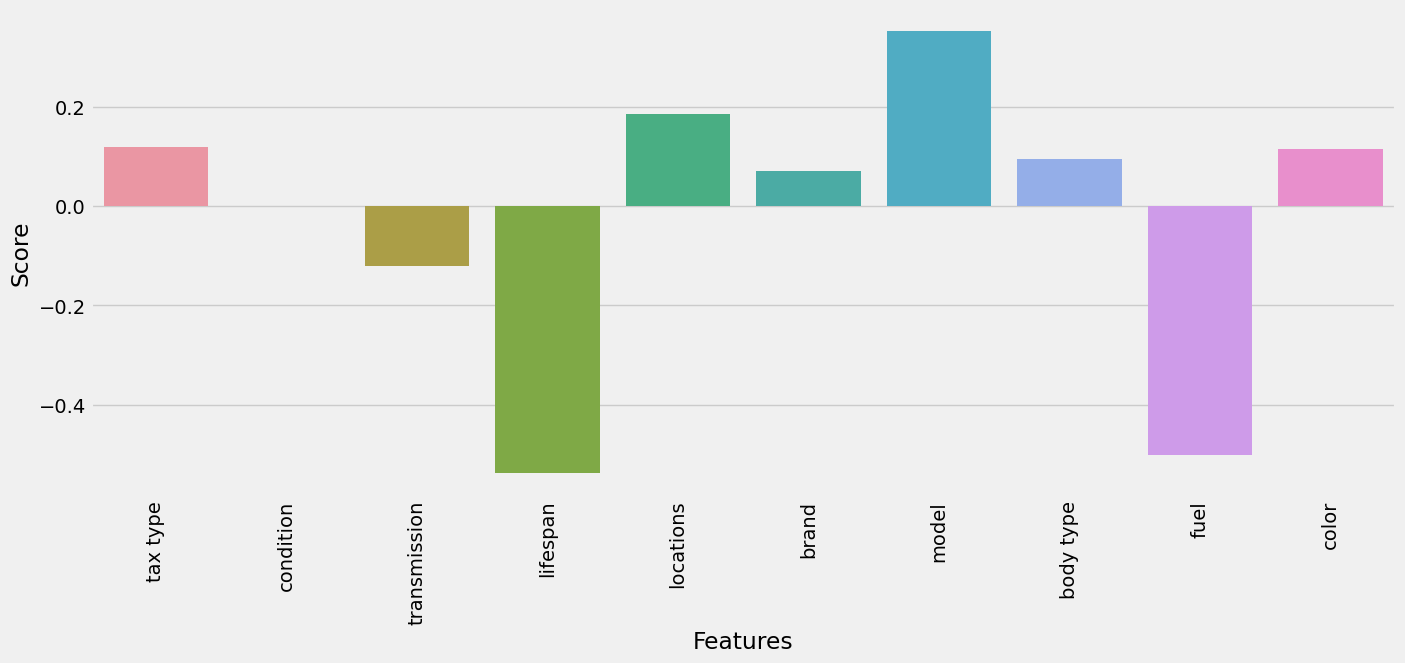

In [80]:
df_import_lm, col_train_lm, col_test_lm = visualize_linear_features_importance(X_train, X_test, y_train, LinearRegression())

Statistics=0.979, p=0.000
Residual does not look Gaussian (reject H0)


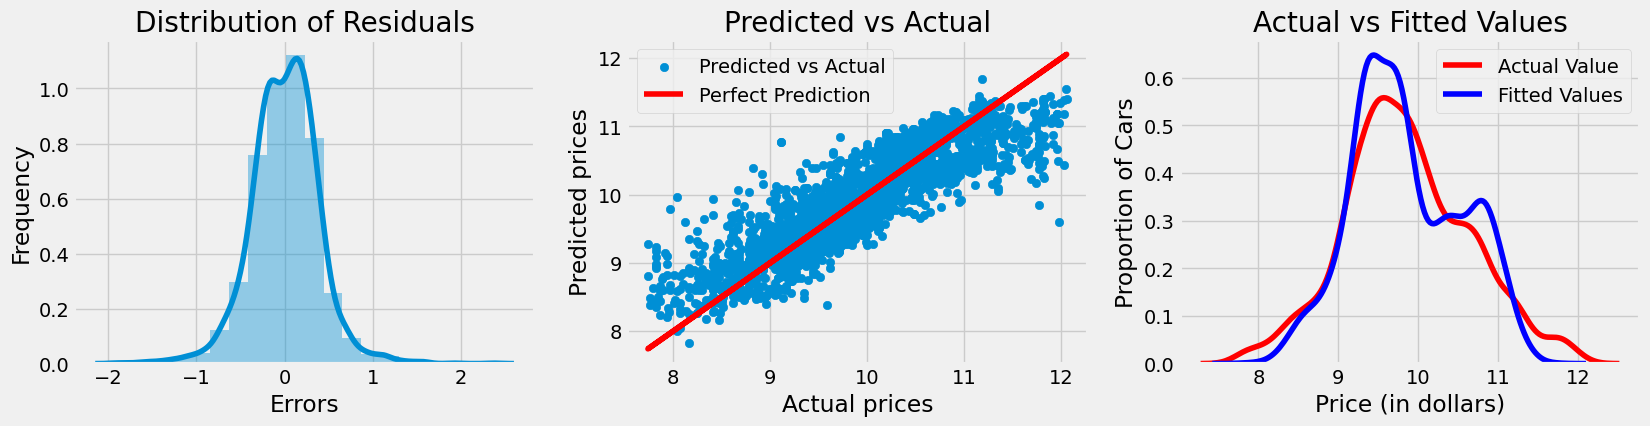

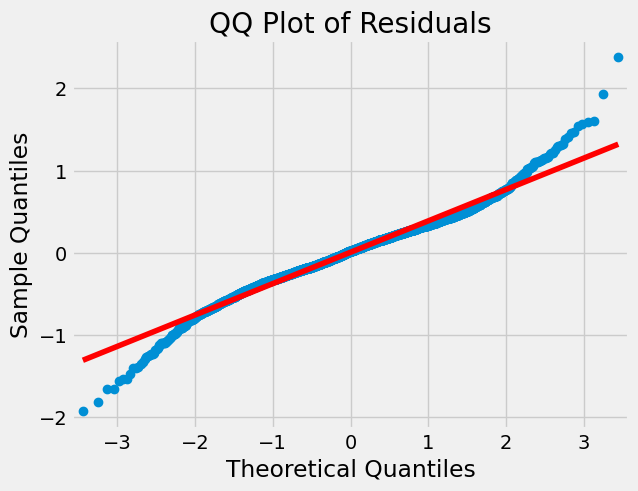

In [81]:
residual_lm = residual_plot(X_train, X_test, y_train, y_test, LinearRegression(), log= False)

### Error term 

In [82]:
df_rs_lm = df_residual(X_test, y_test, lm, log= True)
df_rs_lm.head()

Actual_values  Predicted_values  Error_values
0      4800.0000         5820.3885    -1020.3885
1     23600.0000        17891.3655     5708.6345
2      8500.0000         8251.4080      248.5920
3     26000.0000        25888.4902      111.5098
4     16500.0000        11944.3398     4555.6602

<blockquote style="background-color: lightcoral; padding: 10px;">
Based on the R-squared (R2) score of 77.59% on the training data and 76.54% on the testing data, the <strong>linear regression model</strong> trained appears to be performing well on both the training and testing datasets. The MSE of 243899675.63 means that, on average, the model's predictions for car prices in Dollars are off by approximately 15617$, but overall is relatively accurate. 
</blockquote>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### Features selection 

In [83]:
X_train_new = feature_selection_vif_pvalues(X_train, y_train, vif_thresh= 5)
X_test_new = X_test[X_train_new.columns]

In [84]:
VIF(X_train_new)

Features    VIF
0         model 2.2200
1      lifespan 1.9400
2         brand 1.6700
3      tax type 1.4200
4     body type 1.4100
5         color 1.3400
6          fuel 1.2400
7     locations 1.1500
8  transmission 1.1100

In [85]:
ODL_checking(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     3105.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:12:04   Log-Likelihood:                -3556.5
No. Observations:                8080   AIC:                             7133.
Df Residuals:                    8070   BIC:                             7203.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.7475      0.008   1270.392   

r2_Score of LinearRegression model on Training Data is: 77.5915491846389
r2_Score of LinearRegression model on Testing Data is: 76.59463873865684
MSE of LinearRegression model on Testing Data is: 0.14570292303749838
The number of predictors: 9


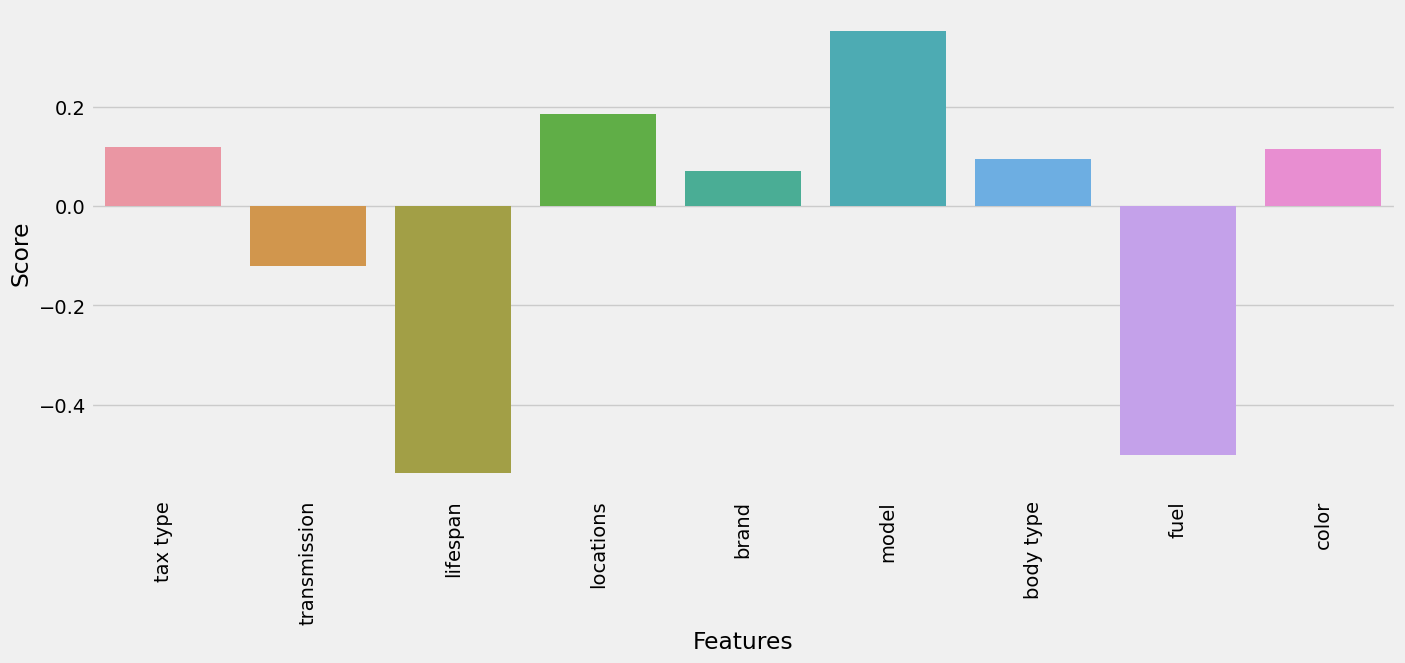

In [86]:
adjust_r_square_lm, lm_new = model_prediction(X_train_new, X_test_new, y_train, y_test, LinearRegression(), 'Linear Regression Model',log= False, record=False)
df_import_lm_new, col_train_lm_new, col_test_lm_new = visualize_linear_features_importance(X_train_new, X_test[X_train_new.columns], y_train, LinearRegression())

Statistics=0.979, p=0.000
Residual does not look Gaussian (reject H0)


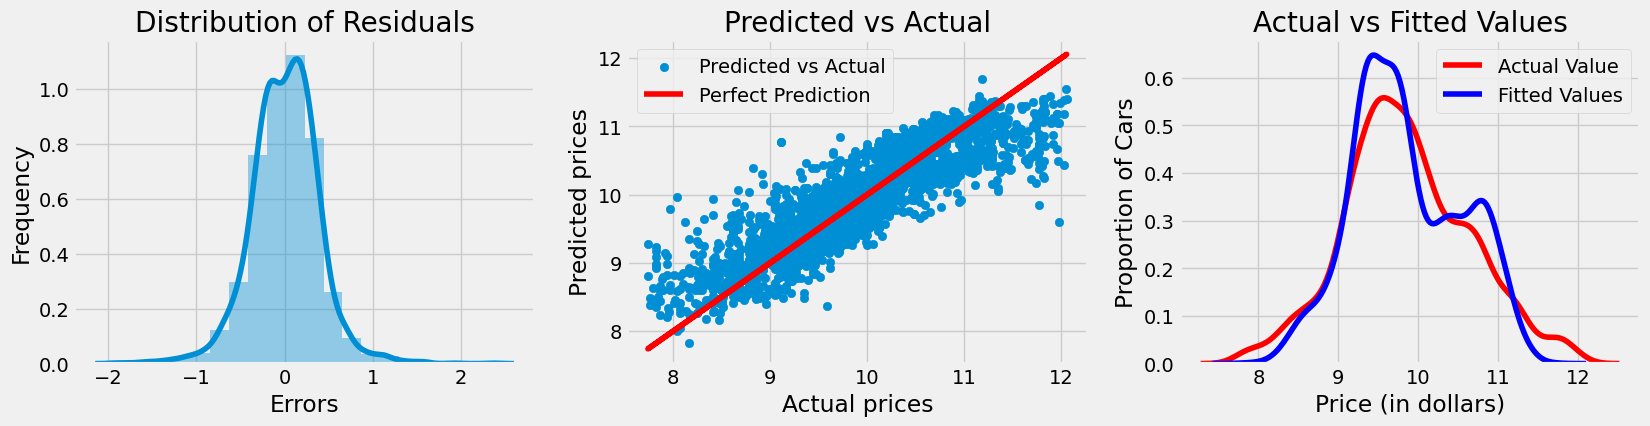

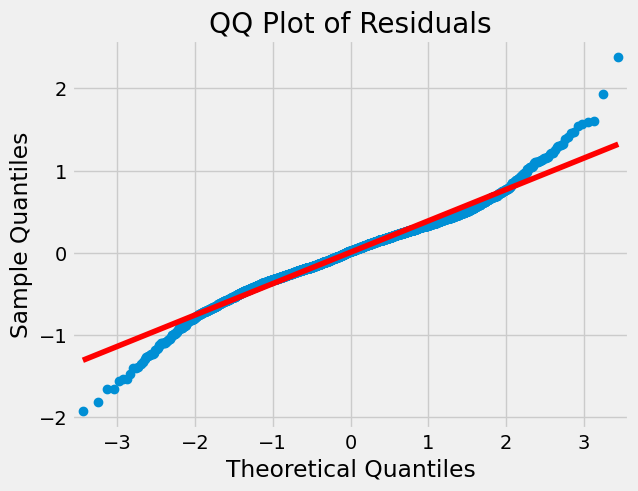

In [87]:
residual_lm_new = residual_plot(X_train_new, X_test[X_train_new.columns.tolist()], y_train, y_test, LinearRegression())

### Error term 

In [88]:
df_rs_lm_new = df_residual(X_test_new, y_test, lm_new, log=True)
df_rs_lm_new.head()

Actual_values  Predicted_values  Error_values
0      4800.0000         5820.5020    -1020.5020
1     23600.0000        17891.6120     5708.3880
2      8500.0000         8251.4275      248.5725
3     26000.0000        25889.1717      110.8283
4     16500.0000        11944.4665     4555.5335

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b><a id = '6.2'>2. Ridge Regressor </a></b> Model</h2>

Alpha: 2.2229964825261956
r2_Score of Ridge model on Training Data is: 77.59128101974977
r2_Score of Ridge model on Testing Data is: 76.5970653632156
MSE of Ridge model on Testing Data is: 249098665.62673163
The number of predictors: 10


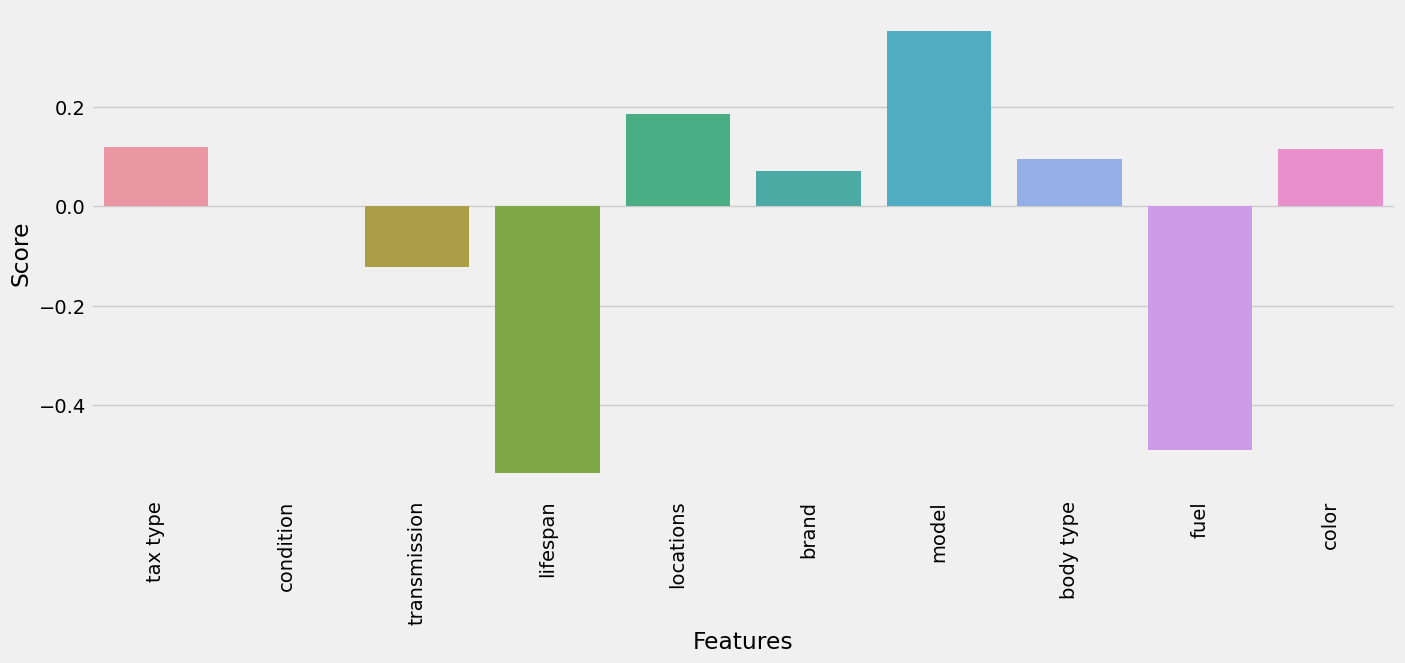

In [89]:
ridgecv = RidgeCV(alphas=np.logspace(-2, 3, num=50), cv = kf)
ridgecv.fit(X_train, y_train)
alpha = ridgecv.alpha_
print('Alpha:', alpha)
adjust_r_square_ridge, ridge_model = model_prediction(X_train, X_test, y_train, y_test, Ridge(alpha=alpha), 'Ridge Regression Model',log=True,  record=True)
df_import_ridge, col_train_ridge, col_test_ridge = visualize_linear_features_importance(X_train, X_test, y_train, Ridge(alpha=alpha))

Statistics=0.979, p=0.000
Residual does not look Gaussian (reject H0)


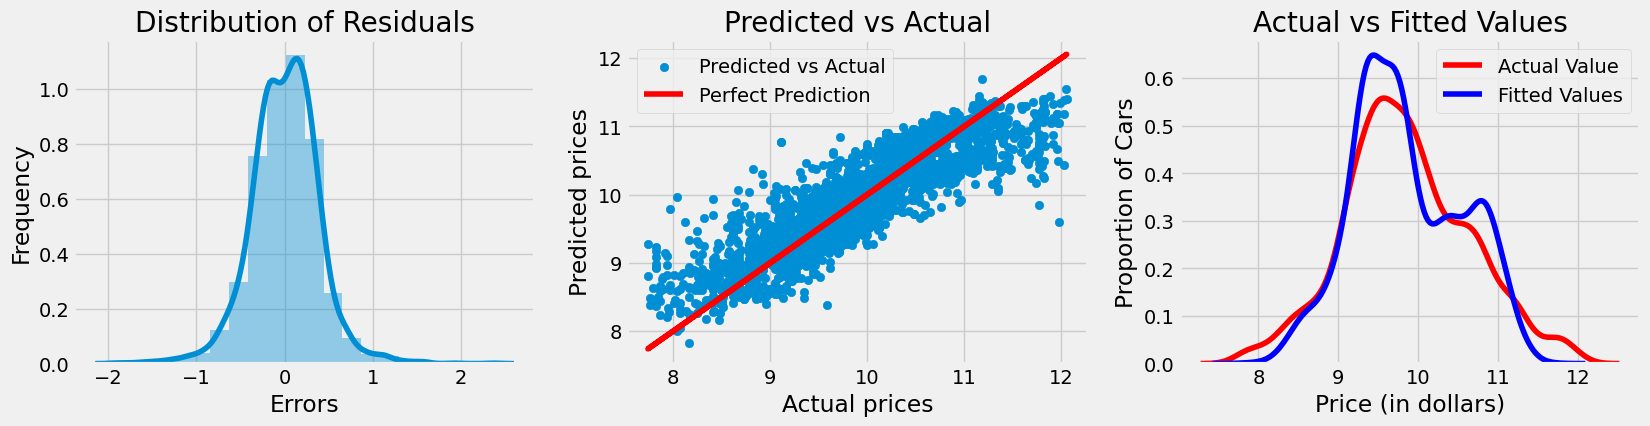

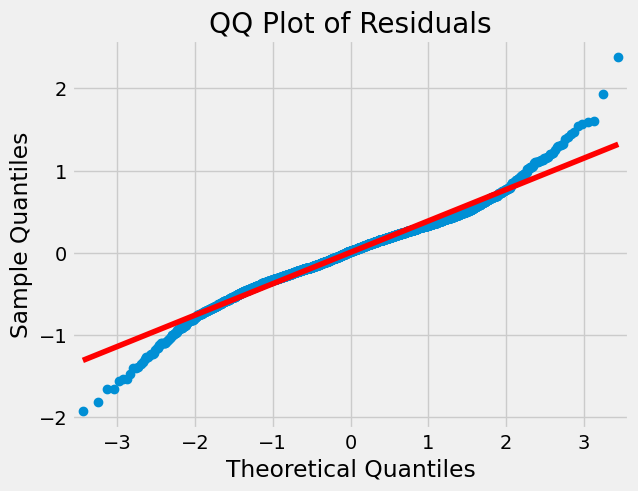

In [90]:
residual_ridge = residual_plot(X_train, X_test, y_train, y_test, Ridge(alpha=alpha), log= True)

### Error term 

In [91]:
df_rs_ridge = df_residual(X_test, y_test, ridge_model, log=True)
df_rs_ridge.head()

Actual_values  Predicted_values  Error_values
0      4800.0000         5824.3020    -1024.3020
1     23600.0000        17896.5456     5703.4544
2      8500.0000         8253.9300      246.0700
3     26000.0000        25887.1813      112.8187
4     16500.0000        11943.0500     4556.9500

<blockquote style="background-color: lightcoral; padding: 10px;">
The <strong>Ridge model</strong> with an alpha of 2.2229964825261956 performs reasonably well with R2 scores of 77.59% on training data and 76.55% on testing data. The model's predictions for car prices in Dollars are off by approximately 15622$. The model uses 10 predictors to make its predictions about car prices.
</blockquote>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b><a id = '6.3'>3. Lasso Regressor </a></b> Model</h2>

Alpha: 0.01
r2_Score of Lasso model on Training Data is: 76.4846691893956
r2_Score of Lasso model on Testing Data is: 75.66554649762708
MSE of Lasso model on Testing Data is: 261637482.58348656
The number of predictors: 6


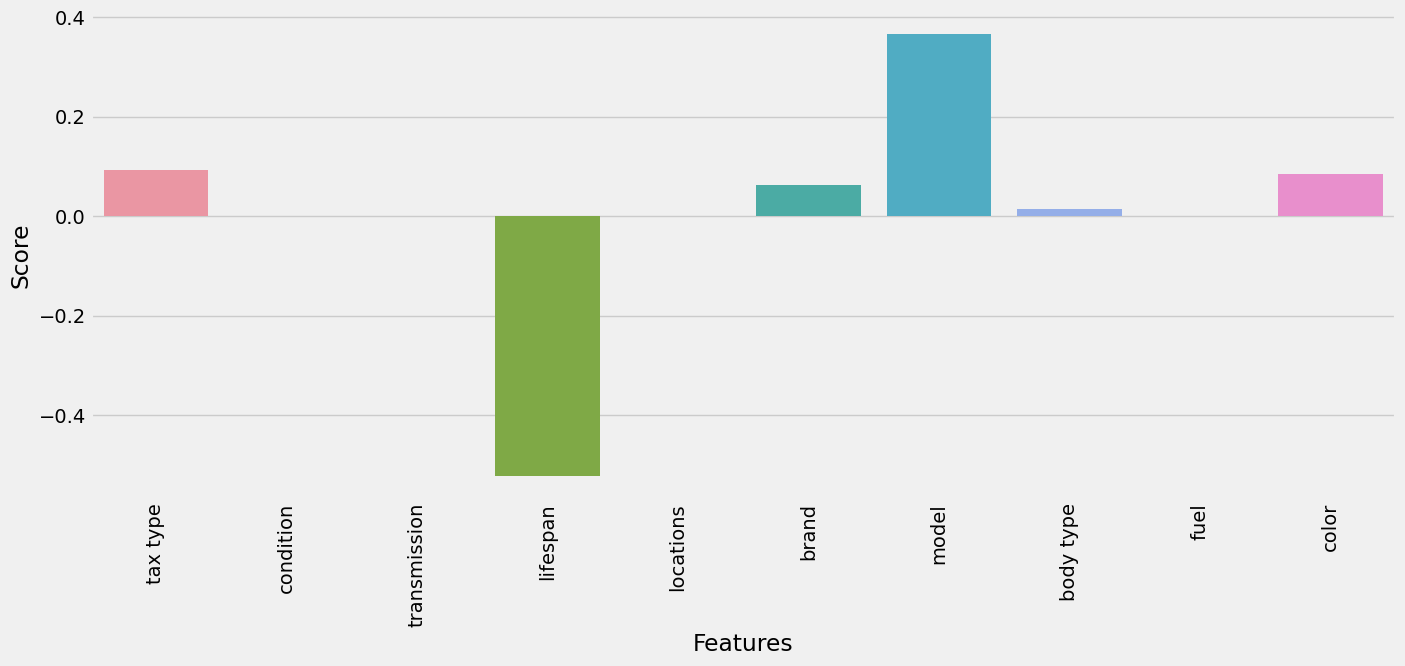

In [92]:
lasso_cv = LassoCV(alphas=np.logspace(-2, 3, num=50), cv = kf, max_iter=int(5e4))
lasso_cv.fit(X_train, y_train)
alpha = lasso_cv.alpha_
print('Alpha:', alpha)
adjust_r_square_lasso, lasso_model = model_prediction(X_train, X_test, y_train, y_test, Lasso(alpha=alpha), 'Lasso Regresion Model',log=True,  record=True)

df_import_lasso, col_train_lasso, col_test_lasso = visualize_linear_features_importance(X_train, X_test, y_train, Lasso(alpha=alpha))

Statistics=0.978, p=0.000
Residual does not look Gaussian (reject H0)


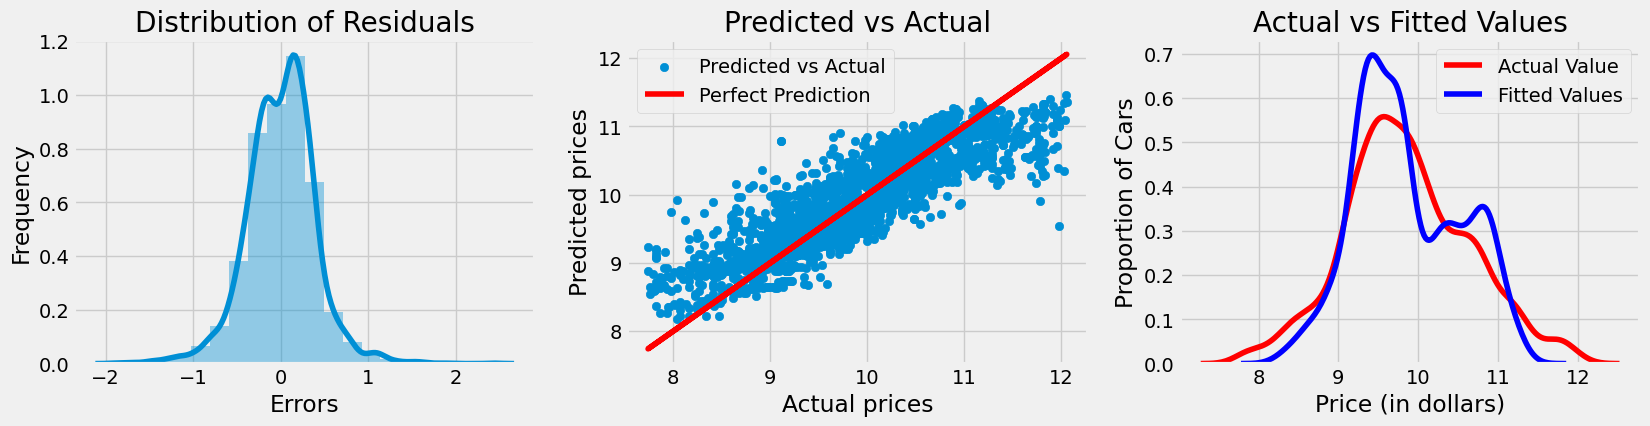

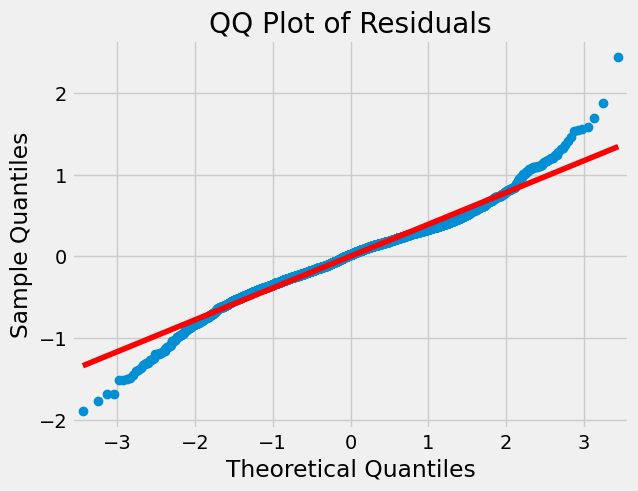

In [93]:
residual_lasso = residual_plot(X_train, X_test, y_train, y_test, Lasso(alpha=alpha))

In [94]:
df_rs_lasso = df_residual(X_test, y_test, lasso_model, log=True)
df_rs_lasso.head()

Actual_values  Predicted_values  Error_values
0      4800.0000         7194.5311    -2394.5311
1     23600.0000        18881.6750     4718.3250
2      8500.0000        10493.4389    -1993.4389
3     26000.0000        26783.1096     -783.1096
4     16500.0000        11759.0564     4740.9436

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b><a id = '6.4'>3. Polynormail Regression </a></b> Model</h2>

In [95]:
Input_linear =[ ('polynomial', PolynomialFeatures(include_bias= False)), ('model',LinearRegression())]
Input_ridge = [ ('polynomial', PolynomialFeatures(include_bias=False)), ('model',Ridge())]
Input_lasso = [ ('polynomial', PolynomialFeatures(include_bias=False)), ('model',Lasso())]


polynormail = Pipeline(Input_linear)
ridge_poly = Pipeline(Input_ridge)
lasso_poly = Pipeline(Input_lasso)

Degree of polynormial: 2
r2_Score of Pipeline model on Training Data is: 80.50714125639554
r2_Score of Pipeline model on Testing Data is: 79.85149856448854
MSE of Pipeline model on Testing Data is: 224542029.86544707
The number of predictors: 65


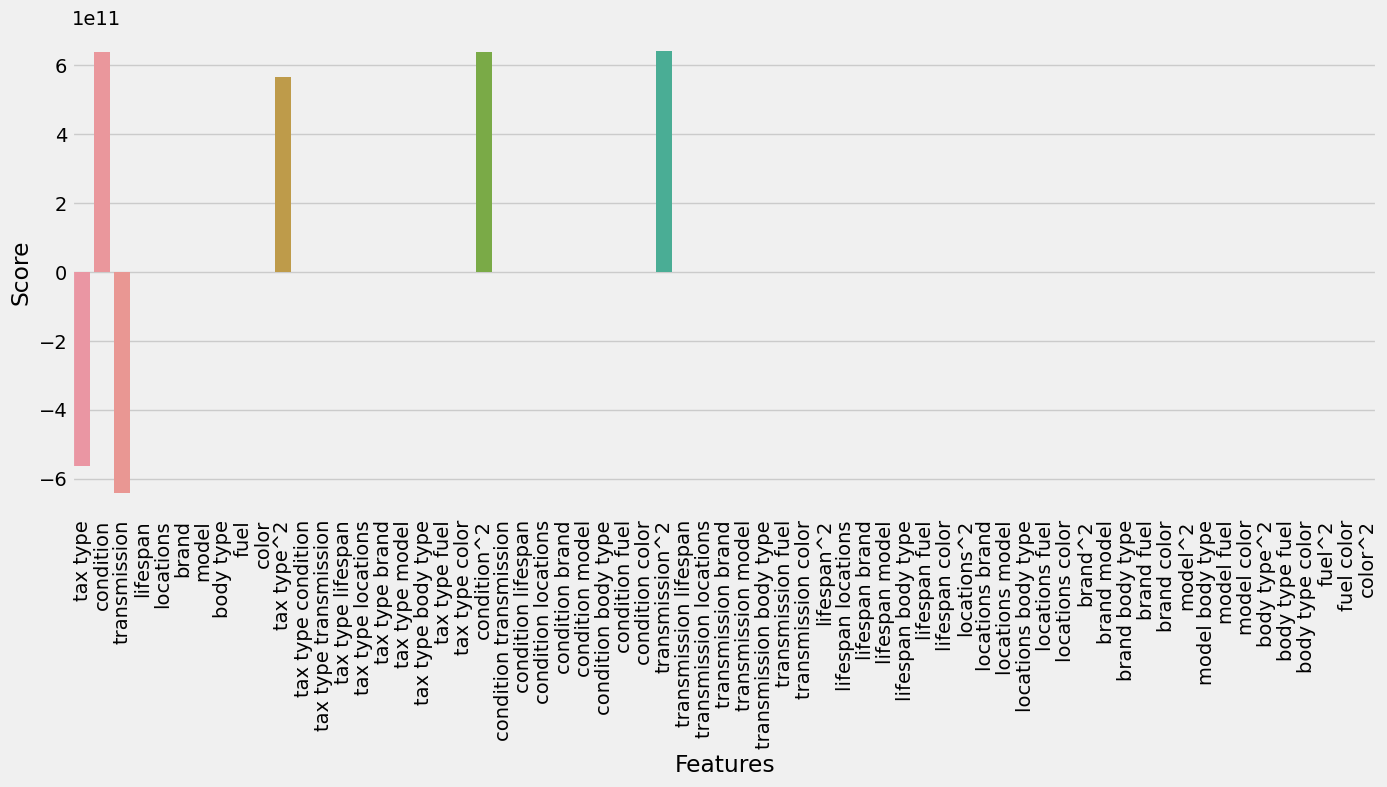

In [96]:
param_grid = {
    "polynomial__degree": [1, 2, 3]
#     "model__normalize":[True, False]
}
# Input_linear = Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())])
search_poly = GridSearchCV(polynormail, param_grid, n_jobs=-1, cv = kf).fit(X_train, y_train)
polynomial_best = search_poly.best_estimator_

print('Degree of polynormial:',search_poly.best_params_['polynomial__degree'])

adjust_r_square_poly, poly_model= model_prediction(X_train, X_test, y_train, y_test, polynomial_best, 'Polynomial Regression Model',log= True, record=True)
df_import_poly, col_train_poly, col_test_poly = visualize_linear_features_importance(X_train, X_test, y_train, polynomial_best, pipe_transform='polynomial')

Statistics=0.967, p=0.000
Residual does not look Gaussian (reject H0)


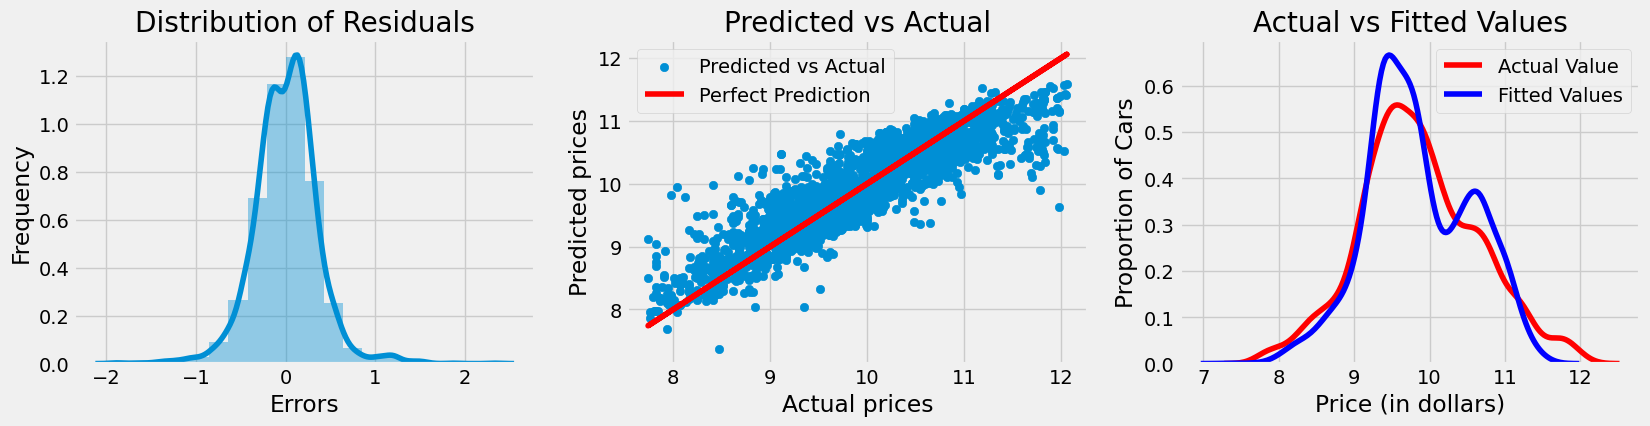

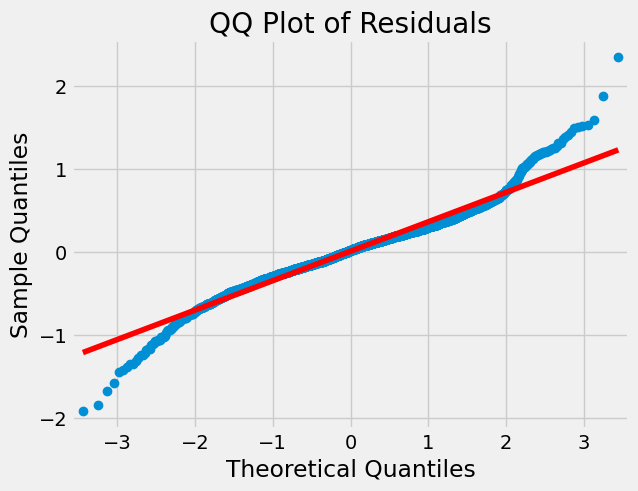

In [97]:
residual_poly = residual_plot(X_train, X_test, y_train, y_test, polynomial_best, log= True)

In [98]:
df_rs_poly = df_residual(X_test, y_test, poly_model, log=True)
df_rs_poly.head()

Actual_values  Predicted_values  Error_values
0      4800.0000         5963.8294    -1163.8294
1     23600.0000        18230.2337     5369.7663
2      8500.0000        10500.8839    -2000.8839
3     26000.0000        29376.1140    -3376.1140
4     16500.0000        12365.2394     4134.7606

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6.5"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b><a id = '6.5'>4. Ridge Polynormail Regression </a></b> Model</h2>

In [ ]:
param_grid = {
    "polynomial__degree": [1, 2, 3],
    "model__alpha": np.logspace(-2, 3, num=50),
#     "model__normalize":[True, False]
}
search_ridge = GridSearchCV(ridge_poly, param_grid, n_jobs=-1, cv = kf).fit(X_train, y_train)
ridge_best=search_ridge.best_estimator_
print('Best parameter:',search_ridge.best_params_)
adjust_r_squar_ridge_poly, poly_ridge_model=model_prediction(X_train, X_test, y_train, y_test,ridge_best, 'Ridge Poly Regresion Model',log= False,  record=True)
df_import_poly_ridge, col_train_poly_ridge, col_test_poly_ridge = visualize_linear_features_importance(X_train, X_test, y_train, ridge_best, pipe_transform='polynomial')

In [ ]:
residual_poly_ridge = residual_plot(X_train, X_test, y_train, y_test, ridge_best)

### Error term

In [ ]:
df_rs_poly_ridge = df_residual(X_test, y_test, poly_ridge_model, log= True)
df_rs_poly_ridge.head()

<blockquote style="background-color: lightcoral; padding: 10px;">
The <strong> Ridge polynormail model </strong>with the best parameters, alpha = 3.56 and polynomial degree = 3, performs impressively on the training data with an R2 score of 83.09%. It also generalizes well to new data, achieving an R2 score of 81.52% on the testing data. The model's predictions for car prices in Dollars have an average error of approximately \$205,201,908 means that, on average, the model's predictions for car prices in Dollars are off by approximately \$14324, It utilizes 285 predictors to make accurate predictions about car prices.
</blockquote>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6.6"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b><a id = '6.6'>5. Lasso Polynormail Regression </a></b> Model</h2>

In [ ]:
param_grid = {
    "polynomial__degree": [1, 2, 3],
    "model__alpha": np.logspace(-2, 3, num=50)
#     "model__normalize":[True, False]
}
search_lasso = GridSearchCV(lasso_poly, param_grid, n_jobs=-1, cv = kf).fit(X_train, y_train)
lasso_best=search_lasso.best_estimator_

print('Best parameter:',search_lasso.best_params_)
adjust_r_squar_lasso_poly, poly_lasso_model = model_prediction(X_train, X_test, y_train, y_test,lasso_best, 'Lasso Poly Regresion Model',log=True,  record=True)
df_import_poly_lasso, col_train_poly_lasso, col_test_poly_lasso = visualize_linear_features_importance(X_train, X_test, y_train, lasso_best, pipe_transform='polynomial')

In [ ]:
residual_poly_lasso = residual_plot(X_train, X_test, y_train, y_test, lasso_best)

### Error term 

In [ ]:
df_rs_poly_lasso = df_residual(X_test, y_test, poly_lasso_model, log=True)
df_rs_poly_lasso.head()

### Model selection 

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

In [ ]:
X_train_new_poly_lasso = drop_high_vif_features(col_train_poly_lasso)
X_test_new_poly_lasso = col_test_poly_lasso[X_train_new_poly_lasso.columns]
VIF(X_train_new_poly_lasso)

In [ ]:
lasso_cv = LassoCV(alphas=np.logspace(-2, 3, num=50), cv = kf)
lasso_cv.fit(X_train, y_train)
alpha = lasso_cv.alpha_

print('Best parameter:',search_lasso.best_params_)
adj_r2_new_poly_lasso, new_poly_lasso_model = model_prediction(X_train_new_poly_lasso, X_test_new_poly_lasso, y_train, y_test, Lasso(alpha=alpha), 'Lasso Poly select',log = True, record= True )
df_import_new_poly_lasso, col_train_new_poly_lasso, col_test_new_poly_lasso = visualize_linear_features_importance(X_train_new_poly_lasso, X_test_new_poly_lasso, y_train, Lasso(alpha=alpha), pipe_transform='polynomial')

In [ ]:
residual_poly_lasso_new = residual_plot(X_train_new_poly_lasso, X_test_new_poly_lasso, y_train, y_test, Lasso(alpha=alpha))

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
All Model Performance Comparison
</p>
</div>

In [ ]:
df_model = pd.DataFrame.from_dict(Algorithms)
df_model

### Plotting above results using column-bar chart.

In [ ]:
df_model.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 Highest performance was give by Ridge Polynormail Model around 80%.<br>
💡 The models are good enough to predict the carprices which explains the variance of data upto 80% and the model is significant.<br>    
</div>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### Demo erro for unseen data 

In [ ]:
a = df.loc[:30, :].drop(columns=['brand_category'], axis = 1)

b = encoding_unseen_data(a, mapping_lable, target_encoder)

b.drop('price', axis = 1, inplace= True)

prediction(b, poly_model, rb_sc_train, from_object= True, log= True) 

In [ ]:
a['price'].apply(lambda x: np.exp(x))

In [ ]:
df_residual(b, a['price'], poly_ridge_model,scaler= rb_sc_train, from_object=True, log=True)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
<a id = '7'> <span>Conclusion </span></a>
</p>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Car Price Prediction with Machine Learning.<br>

<b>Key-Points</b><br>

💡 First we did the <b>Basic Understanding of Data</b><br>
💡 Then we performed <b>Data Cleaning</b> to make the raw data more useable while analysis.<br>
💡 Then we performed <b>Exploratory Data Analysis</b> to generate insights from the data.<br>
💡 Then we performed <b>Data Preprocessing</b> to make data suitable for model training & testing.<br>
💡 Then we trainined our model using different Machine Learning Algorithms.<br>
💡 In the end we came with <b>80% accuracy</b> which was given by <b>Ridge Polynormail Regression model</b>.So we can use this model for predicting price of a car in future.<br>
</div>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
    
### <center>Thank you for reading🙂</center>
### <center>If you have any feedback or find anything wrong, please let me know!</center>